___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import clean_columns
from skimpy import skim
import scipy.stats as stats
import re

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# creating functions
def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''\n' "!?|.,*+-_/]['''):
    """
    exclude  - category seperator at rows
    pattern  - value split at rows with regex
    strip    - cleaning unnecessary characters
    """
    import re
    column = Series.dropna().apply(str).str.strip(strip)
    diff_value = list()
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [269]:
benzine = ["Gasoline", "Regular", "Others", "Super"]
diesel  = ["Biodiesel", "Diesel"]
lpg     = ["Biogas", "CNG", "Domestic gas H", "LPG"]
hybrid  = ['Electric', 'Electric/Gasoline']

def fueltype(x):
    if any(i in x for i in hybrid):
        return "Hybrid"
    elif any(i in x for i in lpg):
        return "LPG/CNG"
    elif any(i in x for i in benzine):
        return "Benzine"
    elif any(i in x for i in diesel):
        return "Diesel"
    else:
        return x 

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Reading the data from file</p>

In [3]:
df0 = pd.read_json('scout_car.json', lines=True)
df = df0.copy()
df.head(2).T

,0,1
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...
make_model,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport
body_type,Sedans,Sedans
price,15770,14500
vat,VAT deductible,Price negotiable
km,"56,013 km","80,000 km"
registration,01/2016,03/2017
prev_owner,2 previous owners,None
kW,NaN,NaN


In [4]:
df.tail(2).T

,15917,15918
url,https://www.autoscout24.com//offers/renault-es...,https://www.autoscout24.com//offers/renault-es...
make_model,Renault Espace,Renault Espace
short_description,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX
body_type,Van,Van
price,39700,40999
vat,VAT deductible,VAT deductible
km,10 km,- km
registration,06/2019,01/2019
prev_owner,None,1 previous owner
kW,NaN,NaN


In [5]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

> Need to clean column names

In [6]:
df.shape

(15919, 54)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15919.000,18019.897,7386.169,13.000,12850.000,16900.000,21900.000,74600.000
kW,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Not so much to get descriptive stats, data needs cleaning

# PART- 1 `( Data Cleaning )`

## Columns

**Cleaning column names with** `skimpy.clean_columns`

In [9]:
df = clean_columns(df)
print(df.columns)

42 column names have been cleaned

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'k_w', 'hp', 'type',
       'previous_owners', 'next_inspection', 'inspection_new', 'warranty',
       'full_service', 'non_smoking_vehicle', 'null', 'make', 'model',
       'offer_number', 'first_registration', 'body_color', 'paint_type',
       'body_color_original', 'upholstery', 'body', 'nr_of_doors',
       'nr_of_seats', 'model_code', 'gearing_type', 'displacement',
       'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption',
       'co_2_emission', 'emission_class', 'comfort_&_convenience',
       'entertainment_&_media', 'extras', 'safety_&_security', 'description',
       'emission_label', 'gears', 'country_version', 'electricity_consumption',
       'last_service_date', 'other_fuel_types', 'availability',
       'last_timing_belt_service_date', 'available_from'],
      dtype='object')


> need to rename some column names

In [10]:
df.rename(columns =     {"k_w": "kW",
                        "co_2_emission":"CO2_emission",
                        "comfort_&_convenience":"comfort_convenience",
                        "entertainment_&_media":"entertainment_media",
                        "safety_&_security":"safety_security"
                        }, inplace=True)

df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'type',
       'previous_owners', 'next_inspection', 'inspection_new', 'warranty',
       'full_service', 'non_smoking_vehicle', 'null', 'make', 'model',
       'offer_number', 'first_registration', 'body_color', 'paint_type',
       'body_color_original', 'upholstery', 'body', 'nr_of_doors',
       'nr_of_seats', 'model_code', 'gearing_type', 'displacement',
       'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption',
       'CO2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'description',
       'emission_label', 'gears', 'country_version', 'electricity_consumption',
       'last_service_date', 'other_fuel_types', 'availability',
       'last_timing_belt_service_date', 'available_from'],
      dtype='object')

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Detailed Examination of Data Column by Column</p>

### <p style="background-color:#e68a00; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Numeric Features</p>

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">price (target feature)</p>

In [11]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [12]:
df.price.isnull().sum()

0

> No null values

In [13]:
#Checking the statistical values
df.price.describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

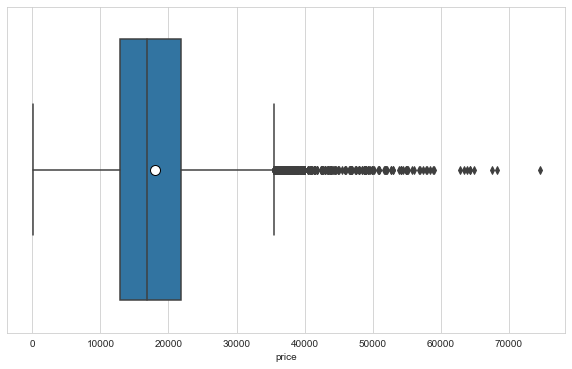

In [14]:
# Checking the boxplot to see extreme values
sns.boxplot(data=df, 
            x="price",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

>**Conclusion:** There's so many extreme values in car prices.

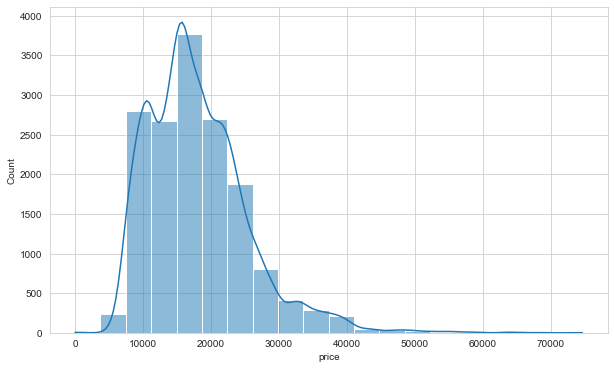

In [15]:
# Checking the histplot/kdeplot to see distribution of feature
sns.histplot(data=df, x="price", bins=20, kde=True);

>**Conclusion:** Positively-skewed distribution, right-tail.

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">km</p>

In [16]:
df.km = df0.km.copy()
df.km

0        56,013 km
1        80,000 km
2        83,450 km
3        73,000 km
4        16,200 km
           ...    
15914         - km
15915     9,900 km
15916        15 km
15917        10 km
15918         - km
Name: km, Length: 15919, dtype: object

>Need a little bit of cleaning

In [17]:
# getting rid of "km" at the end and "," in numbers as well as trailing whitespaces
df["km"] = df["km"].str.replace("km", "")
df["km"] = df["km"].str.replace(",", "")
df["km"] = df.km.str.strip()

In [18]:
df.km.value_counts()

10       1045
-        1024
1         367
5         170
50        148
         ... 
67469       1
43197       1
10027       1
35882       1
57          1
Name: km, Length: 6690, dtype: int64

In [19]:
# replacing "-" with null
df.km.replace(to_replace="-", value=np.nan, inplace=True)

In [20]:
df.km.isnull().sum()

1024

>**Conclusion:** Has 1024 null values, might need imputation

In [21]:
df.km.dtype

dtype('O')

In [22]:
# changing dtype from 'object' to 'float'
df["km"] = df.km.astype('float')
df.km.dtype

dtype('float64')

In [23]:
df.km.value_counts(dropna=False)

10.000       1045
NaN          1024
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6690, dtype: int64

In [24]:
#Checking the statistical values
df.km.describe()

count    14895.000
mean     34130.128
std      37352.978
min          0.000
25%       5153.000
50%      22740.000
75%      49371.500
max     317000.000
Name: km, dtype: float64

>it's highly dispersed, got std greater than mean. we should expect extreme values

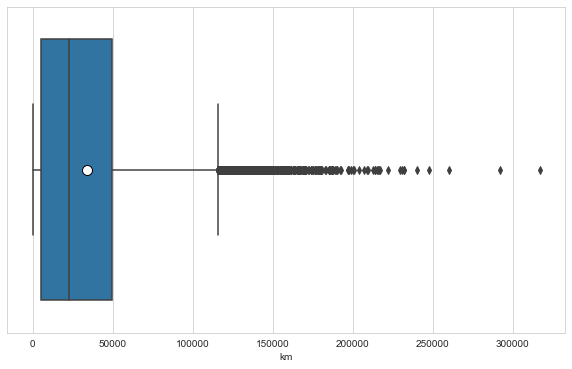

In [25]:
# Checking the boxplot to see extreme values
sns.boxplot(data=df, 
            x="km",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

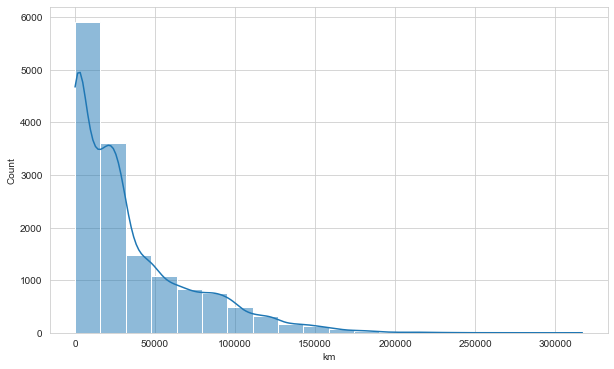

In [26]:
# Checking the histplot/kdeplot to see distribution of feature
sns.histplot(data=df, x="km", bins=20, kde=True);

>**Conclusion:** so many extreme values

In [27]:
# average km by make_model
df.groupby("make_model").km.mean()

make_model
Audi A1          23925.285
Audi A2          26166.000
Audi A3          40340.800
Opel Astra       39023.505
Opel Corsa       25616.985
Opel Insignia    42011.823
Renault Clio     30489.936
Renault Duster     101.000
Renault Espace   35152.019
Name: km, dtype: float64

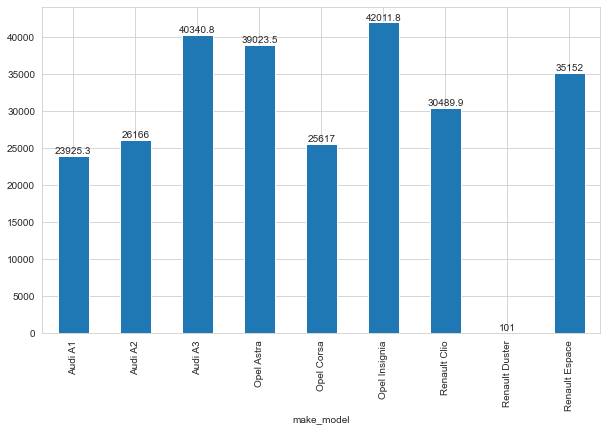

In [28]:
# plotting average km by make_model
ax = df.groupby("make_model").km.mean().plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container);

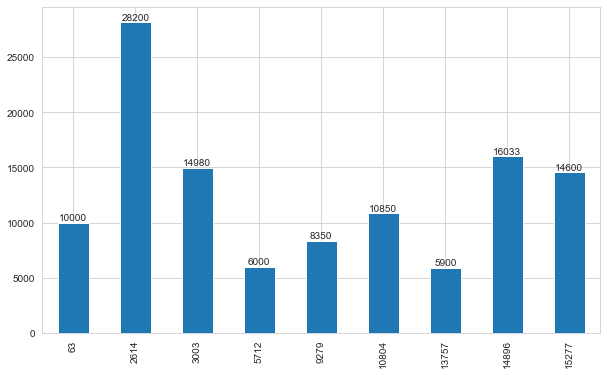

In [29]:
# plotting price info of the highest km cars' in each make model 
ax = df.iloc[df.groupby("make_model").km.idxmax()].price.plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

### <p style="background-color:#e68a00; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Categorical Features</p>

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">url</p>

In [30]:
df.url.value_counts()

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [31]:
df.url.nunique()

15919

>**Conclusion:** all unique values, not needed in analysis, good to drop column

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">make_model</p>

In [32]:
# Checking the count of cars in each categories and visualize it with countplot
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [33]:
df.make_model.isnull().sum()

0

> no null values

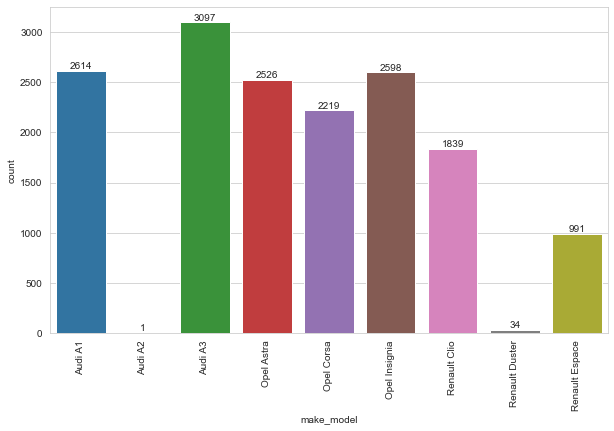

In [34]:
ax = sns.countplot(data=df, x="make_model")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

>**Conclusion:** Audi A2 and Renault Duster models are rare. All Opel models are frequently bought 

In [35]:
# average price by make_model
df.groupby("make_model").price.mean()

make_model
Audi A1          18864.689
Audi A2          28200.000
Audi A3          20996.693
Opel Astra       15834.664
Opel Corsa       11047.096
Opel Insignia    21463.452
Renault Clio     11940.321
Renault Duster   13230.176
Renault Espace   30080.212
Name: price, dtype: float64

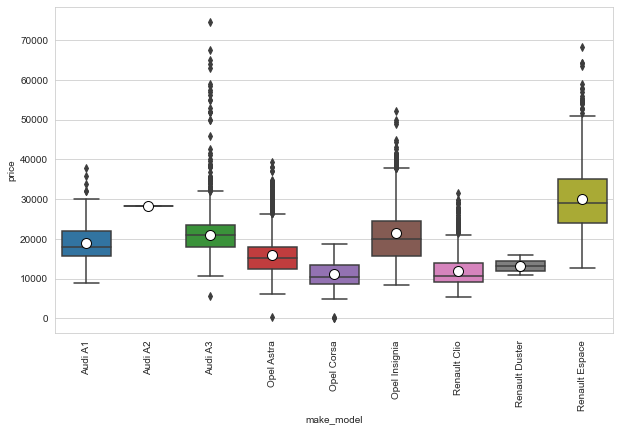

In [36]:
# plotting price by make_model to see extreme values
ax = sns.boxplot(data=df, 
            y="price",
            x="make_model",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

>**Conclusion:** Audi A3 has highest number of extreme values? Opel Corsa almost has no extremes.

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">short_description</p>

In [37]:
# Checking the count of cars in each categories and visualize it with countplot
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [38]:
df.short_description.isnull().sum()

46

> minimal null values. it has detail info in different languages. Good to drop column, 

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">body_type</p>

In [39]:
# Checking the count of body types in each categories and visualize it with countplot
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [40]:
df.body_type.isnull().sum()

60

> minimal null values

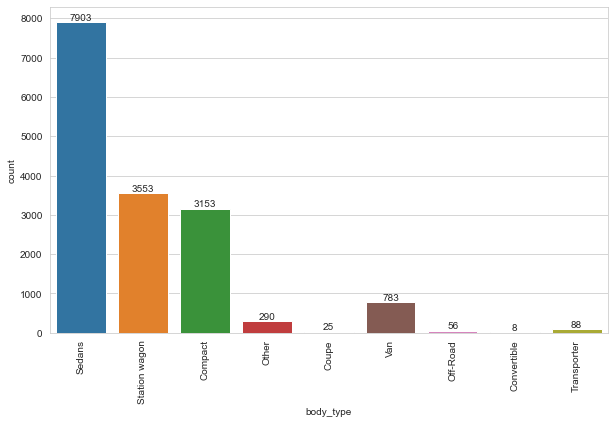

In [41]:
ax = sns.countplot(data=df, x="body_type")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> 'Sedan', 'station wagon' and 'compact' are dominant types.

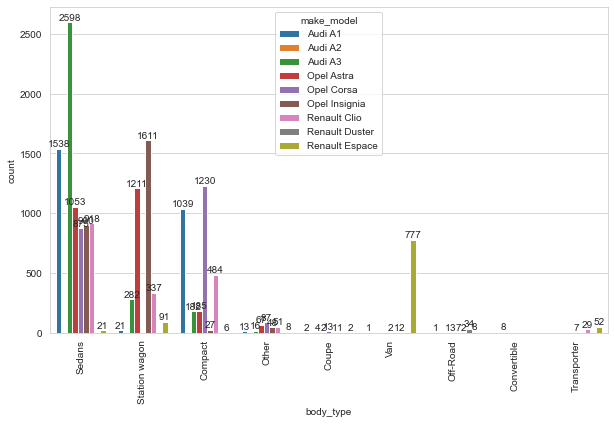

In [42]:
# plotting body_type count by make_model
ax = sns.countplot(data = df, x = "body_type", hue = "make_model")

plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

  - `Audi A3` has the biggest share in `Sedan`,
  - `Opel Insignia` has the biggest share in `Station wagon`,
  - `Opel Corsa` has the biggest share in `Compact`,
  - `Renault Espace` has the biggest share in `Van`.  

In [43]:
df.groupby("body_type").make_model.value_counts()

body_type      make_model    
Compact        Opel Corsa        1230
               Audi A1           1039
               Renault Clio       484
               Opel Astra         185
               Audi A3            182
               Opel Insignia       27
               Renault Espace       6
Convertible    Audi A3              8
Coupe          Opel Corsa          13
               Audi A3              4
               Audi A1              2
               Opel Astra           2
               Renault Espace       2
               Opel Insignia        1
               Renault Clio         1
Off-Road       Renault Duster      34
               Renault Espace       8
               Opel Insignia        7
               Opel Corsa           3
               Renault Clio         2
               Audi A2              1
               Opel Astra           1
Other          Opel Corsa          87
               Opel Astra          67
               Renault Clio        51
               Opel 

>**Conclusion:** Has 60 null values, can convert them to 'Unknown' or 'Other' based on make_model column. Sedan, station wagon and compact are leading body types. Some irregularities exist: Opel Corsa and Renault Clio classified as 'other' or 'off-road' though they are compact car.

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">vat</p>

In [44]:
# Checking the count of VAT types in each categories and visualize it with countplot
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [45]:
df.vat.isnull().sum() / df.vat.shape[0]

0.28349770714240846

>4513 null values, 28% 

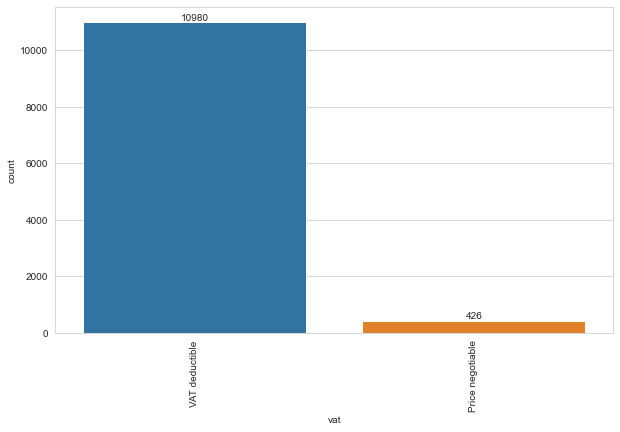

In [46]:
ax = sns.countplot(data=df, x="vat")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

>**Conclusion:** Has 4513 null values, almost one third of all values. Could change to "Unknown". Any chance to imputation?

In [47]:
df.vat.replace(to_replace=np.nan, value="Unknown", inplace=True)

In [48]:
df.vat.value_counts()

VAT deductible      10980
Unknown              4513
Price negotiable      426
Name: vat, dtype: int64

In [49]:
df.groupby("vat").make_model.value_counts()

vat               make_model    
Price negotiable  Audi A3            101
                  Audi A1             81
                  Renault Clio        74
                  Opel Insignia       50
                  Opel Astra          45
                  Opel Corsa          41
                  Renault Espace      34
Unknown           Audi A3            787
                  Renault Clio       781
                  Audi A1            759
                  Opel Astra         653
                  Opel Corsa         571
                  Opel Insignia      568
                  Renault Espace     376
                  Renault Duster      18
VAT deductible    Audi A3           2209
                  Opel Insignia     1980
                  Opel Astra        1828
                  Audi A1           1774
                  Opel Corsa        1607
                  Renault Clio       984
                  Renault Espace     581
                  Renault Duster      16
                  Audi A

In [50]:
# "unknown" count by make_model
df.groupby(df[df["vat"] == "Unknown"]["vat"]).make_model.value_counts()

vat      make_model    
Unknown  Audi A3           787
         Renault Clio      781
         Audi A1           759
         Opel Astra        653
         Opel Corsa        571
         Opel Insignia     568
         Renault Espace    376
         Renault Duster     18
Name: make_model, dtype: int64

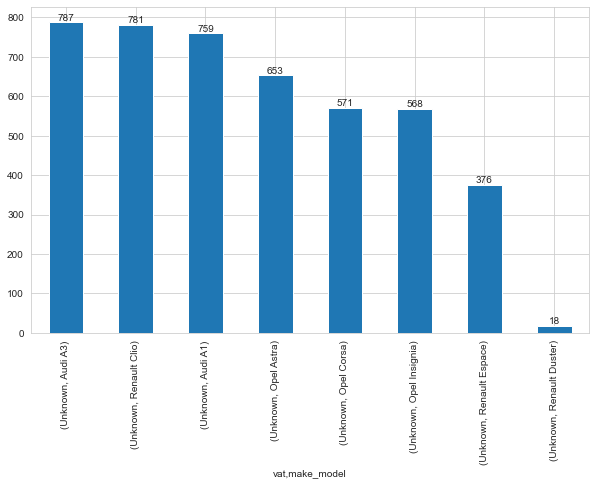

In [51]:
# plotting VAT "unknown" count by make_model
ax = df.groupby(df[df["vat"] == "Unknown"]["vat"]).make_model.value_counts().plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">registration</p>

In [52]:
df["registration"] = df0.registration.copy()

In [53]:
# Checking the count of body types in each categories and visualize it with countplot
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

> 'registration' is 'first registration'. we can use it to create 'age' column

In [54]:
df.registration.isnull().sum()

0

>"-/-" could be interpreted as null. has to convert them

In [55]:
df.registration.replace(to_replace="-/-", value=np.nan, inplace=True)

In [56]:
df.registration.isnull().sum()

1597

In [57]:
# null value percentage
df.registration.isnull().sum() / df.registration.shape[0]

0.10032037188265594

>  10% of all values are null

In [58]:
# assuming we are at the end of 2019 (column has 12/2019 value), we can create "age" column 
# using 'year' part and subtracting from 2020 (i.e. a car registered anytime in 2019 will be 1 year old)

df["age"] = df.registration.map(lambda x: 2020 - int(str(x)[3:]), na_action='ignore')
df["age"]

0       4.000
1       3.000
2       4.000
3       4.000
4       4.000
         ... 
15914     NaN
15915   1.000
15916   1.000
15917   1.000
15918   1.000
Name: age, Length: 15919, dtype: float64

In [59]:
df.age.value_counts(dropna=False)

2.000    4522
4.000    3674
3.000    3273
1.000    2853
NaN      1597
Name: age, dtype: int64

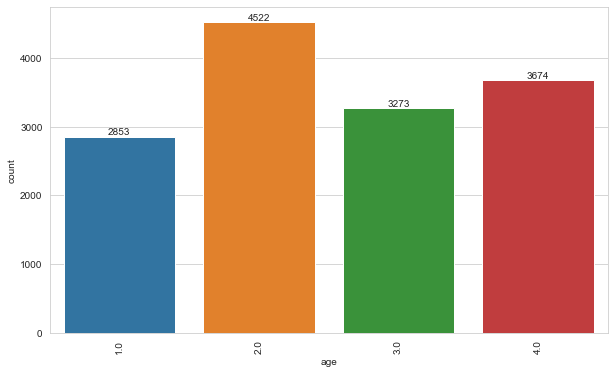

In [60]:
ax = sns.countplot(data=df, x="age")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

In [61]:
df.age.describe().T

count   14322.000
mean        2.542
std         1.077
min         1.000
25%         2.000
50%         2.000
75%         4.000
max         4.000
Name: age, dtype: float64

>**Conclusion:** Null values: any chance to imputation? Compare 'age' to car type (used, new etc) to get insight on prive.

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">prev_owner</p>

In [62]:
# Checking the count of body types in each categories and visualize it with countplot
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

>need to clean 'previous owners'

In [63]:
df["prev_owner"] = df.prev_owner.str.rstrip(' previous owners')

In [64]:
df.prev_owner.value_counts(dropna=False)

1      8294
NaN    6828
2       778
3        17
4         2
Name: prev_owner, dtype: int64

In [65]:
# null value percentage
df.prev_owner.isnull().sum() / df.prev_owner.shape[0]

0.428921414661725

>43% null values, it's a high value

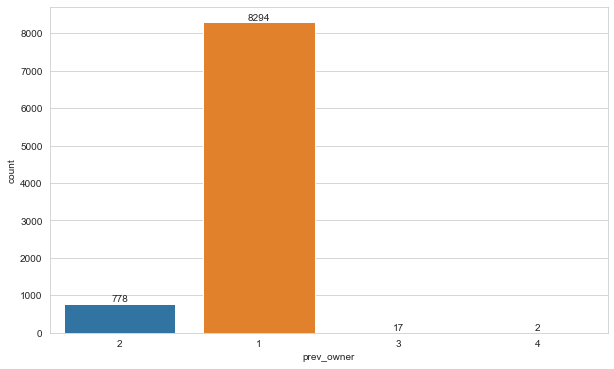

In [66]:
ax = sns.countplot(data=df, x="prev_owner")

for container in ax.containers:
    ax.bar_label(container);

In [ ]:
# prev_owner null values by age, make_model and car_type
#df[df["prev_owner"].isnull()][["age", "make_model", "car_type"]]

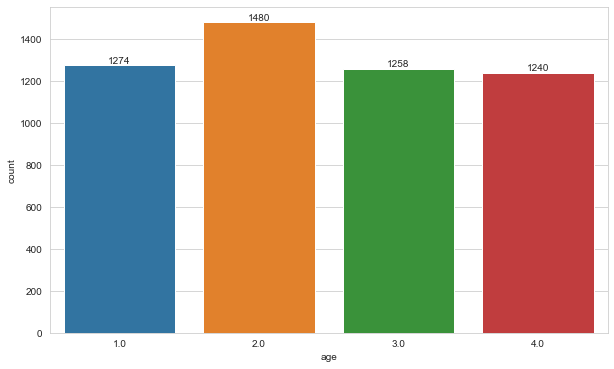

In [68]:
# distribution of age within 'null' prev owner

ax = sns.countplot(data=df, x=df[df["prev_owner"].isnull()]["age"])

for container in ax.containers:
    ax.bar_label(container);

> possible to fillna by comparing/grouping with age, car type

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">kW</p>

In [69]:
df["kW"] = df0["kW"].copy()

In [70]:
# Checking the count of body types in each categories and visualize it with countplot
df.kW.value_counts(dropna=False)

NaN    15919
Name: kW, dtype: int64

> all null values? must be misplaced. good to drop column

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">hp</p>

In [71]:
df["hp"] = df0["hp"].copy()

In [72]:
# Checking the count of body types in each categories and visualize it with countplot
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
84 kW        1
195 kW       1
44 kW        1
239 kW       1
9 kW         1
Name: hp, Length: 81, dtype: int64

> hp' column has kW info. can drop 'kW' column since it has no value.Need to clean 'kw' in rows

In [73]:
df["hp"] = df.hp.str.rstrip(' kW')
df["hp"]

0         66
1        141
2         85
3         66
4         66
        ... 
15914    147
15915    165
15916    146
15917    147
15918    165
Name: hp, Length: 15919, dtype: object

In [74]:
df["hp"].sample(10)

5143     110
3535      81
12665    147
6033     100
9219      51
14883     56
510       70
4450      85
4182      85
3678      85
Name: hp, dtype: object

In [75]:
df.hp.value_counts(dropna=False)

85     2542
66     2122
81     1402
100    1308
110    1112
       ... 
84        1
195       1
44        1
239       1
9         1
Name: hp, Length: 81, dtype: int64

In [76]:
df.hp.replace(to_replace="-", value=np.nan, inplace=True)

In [77]:
df["hp"] = pd.to_numeric(df.hp)
df["hp"]

0        66.000
1       141.000
2        85.000
3        66.000
4        66.000
          ...  
15914   147.000
15915   165.000
15916   146.000
15917   147.000
15918   165.000
Name: hp, Length: 15919, dtype: float64

In [78]:
df.hp.dtype

dtype('float64')

In [79]:
df.hp.value_counts(dropna=False)

85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
           ... 
84.000        1
195.000       1
44.000        1
239.000       1
9.000         1
Name: hp, Length: 81, dtype: int64

In [80]:
df.hp.isnull().sum()

88

>88 null values, minimal

In [81]:
#renaming column to 'hp_kW'
df.rename(columns={'hp':'hp_kW'}, inplace=True)

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">type</p>

In [82]:
df.type = df0.Type.copy()
df.type.head()

0    [, Used, , Diesel (Particulate Filter)]
1                       [, Used, , Gasoline]
2    [, Used, , Diesel (Particulate Filter)]
3    [, Used, , Diesel (Particulate Filter)]
4    [, Used, , Diesel (Particulate Filter)]
Name: type, dtype: object

In [83]:
# Checking the count of body types in each categories and visualize it with countplot
#df.type.value_counts(dropna=False)

In [84]:
# splitting 'type' column into new columns
df.type.apply(pd.Series)

,0,1,2,3
0,,Used,,Diesel (Particulate Filter)
1,,Used,,Gasoline
2,,Used,,Diesel (Particulate Filter)
3,,Used,,Diesel (Particulate Filter)
4,,Used,,Diesel (Particulate Filter)
...,...,...,...,...
15914,,New,,Diesel (Particulate Filter)
15915,,Used,,Super 95 / Super Plus 98 (Particulate Filter)
15916,,Pre-registered,,Diesel
15917,,Pre-registered,,Diesel


>sub-column#1 is for car-type and sub-column#2 is for fuel-type

In [85]:
#arranging type with car-type info
df["type"] = df.type.apply(pd.Series)[1]

In [86]:
df.type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

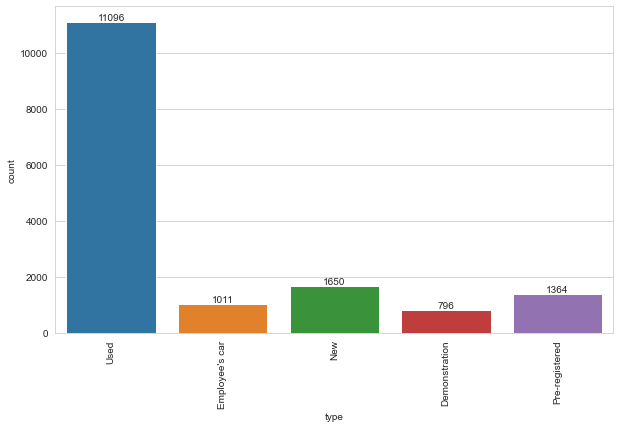

In [87]:
ax = sns.countplot(data=df, x="type")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

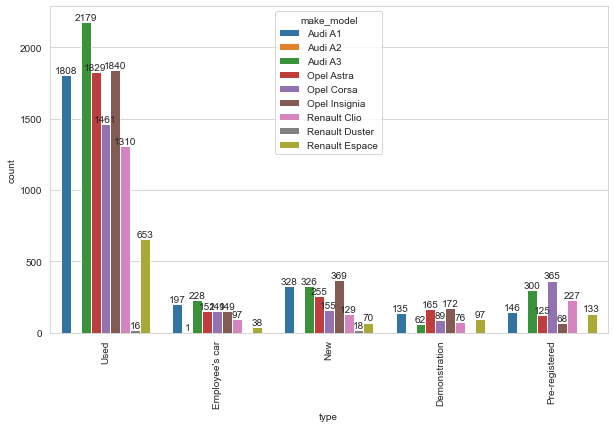

In [88]:
ax = sns.countplot(data = df, x = "type", hue = "make_model")

plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [89]:
#renaming column to 'car_type'
df.rename(columns={'type':'car_type'}, inplace=True)

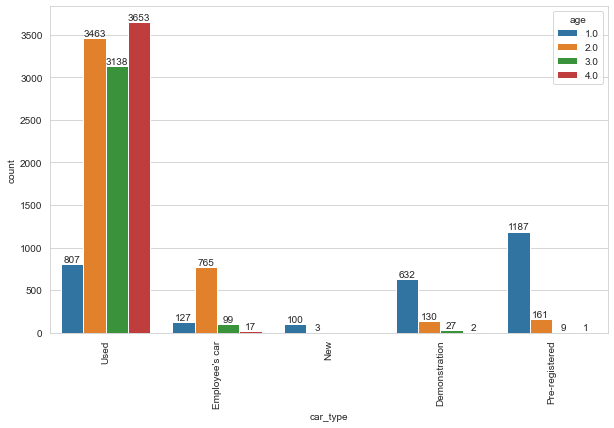

In [90]:
# plotting car_type by age
ax = sns.countplot(data = df, x = "car_type", hue = "age")

plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">previous_owners</p>

In [91]:
df.previous_owners.head(5)

0    \n2\n
1      NaN
2    \n1\n
3    \n1\n
4    \n1\n
Name: previous_owners, dtype: object

In [92]:
# Checking the count of body types in each categories and visualize it with countplot
#df.previous_owners.value_counts(dropna=False)

In [93]:
# splitting 'previous_owners' column into new columns
df.previous_owners.apply(pd.Series)

,0,1,2,3,4,5,6,7
0,\n2\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\n1\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,\n1\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\n1\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
15914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,\n1\n,\n,7.4 l/100 km (comb),\n,9.2 l/100 km (city),\n,6.3 l/100 km (country),\n
15916,\n1\n,\n139 g CO2/km (comb)\n,NaN,NaN,NaN,NaN,NaN,NaN
15917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>has mixed values pertinent to other columns like consumption, CO2 emission. Also need to compare first sub-column to 'prev_owner'

In [94]:
df[df["prev_owner"] == "1"][["prev_owner","car_type", "previous_owners"]].sample(10)

,prev_owner,car_type,previous_owners
10010,1,Pre-registered,\n1\n
9381,1,Used,\n1\n
15806,1,Demonstration,\n1\n
7378,1,Used,\n1\n
15282,1,Used,\n1\n
13368,1,Used,\n1\n
1481,1,Used,\n1\n
8487,1,Used,\n1\n
5029,1,Pre-registered,\n1\n
10461,1,Used,\n1\n


>good to drop column, it's a duplicate of 'prev_owner'

In [96]:
df["previous_owners"] = [item[0] if type(item) == list else item for item in df["previous_owners"]]
df["previous_owners"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: previous_owners, Length: 15919, dtype: object

In [97]:
df["previous_owners"] = df.previous_owners.str.strip("\n")
df["previous_owners"]

0          2
1        NaN
2          1
3          1
4          1
        ... 
15914    NaN
15915      1
15916      1
15917    NaN
15918      1
Name: previous_owners, Length: 15919, dtype: object

In [98]:
df.previous_owners.value_counts(dropna=False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: previous_owners, dtype: int64

In [99]:
df.prev_owner.value_counts(dropna=False)

1      8294
NaN    6828
2       778
3        17
4         2
Name: prev_owner, dtype: int64

>"prev_owner" has more null value (6828) than "prev_owner" (6640). good to drop column "prev_owner"

In [100]:
df[df["previous_owners"] == "0"][["previous_owners","prev_owner"]]

,previous_owners,prev_owner
47,0,None
418,0,None
586,0,None
648,0,None
734,0,None
...,...,...
15301,0,None
15408,0,None
15668,0,None
15853,0,None


#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">next_inspection</p>

In [ ]:
# Checking the count of body types in each categories and visualize it with countplot
#df.next_inspection.value_counts(dropna=False)

In [102]:
df["next_inspection"] = [",".join(item) if type(item) == list else item for item in df["next_inspection"]]
df["next_inspection"]

0         \n06/2021\n,\n99 g CO2/km (comb)\n
1                                        NaN
2                                        NaN
3                                        NaN
4                                        NaN
                        ...                 
15914                                    NaN
15915    \n01/2022\n,\n168 g CO2/km (comb)\n
15916                                    NaN
15917                                    NaN
15918                                    NaN
Name: next_inspection, Length: 15919, dtype: object

In [103]:
df.next_inspection.str.split(",")

0         [\n06/2021\n, \n99 g CO2/km (comb)\n]
1                                           NaN
2                                           NaN
3                                           NaN
4                                           NaN
                          ...                  
15914                                       NaN
15915    [\n01/2022\n, \n168 g CO2/km (comb)\n]
15916                                       NaN
15917                                       NaN
15918                                       NaN
Name: next_inspection, Length: 15919, dtype: object

In [104]:
df["next_inspection"] = df.next_inspection.str.split(",").apply(lambda item: item[0] if type(item) == list else item)
df.next_inspection

0        \n06/2021\n
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
15914            NaN
15915    \n01/2022\n
15916            NaN
15917            NaN
15918            NaN
Name: next_inspection, Length: 15919, dtype: object

In [105]:
df["next_inspection"] = df.next_inspection.str.strip("\n")

In [106]:
df.next_inspection.value_counts(dropna=False)

NaN        12384
06/2021      471
03/2021      210
05/2021      180
04/2021      171
           ...  
05/2014        1
04/2016        1
01/1955        1
01/2018        1
11/2022        1
Name: next_inspection, Length: 78, dtype: int64

In [107]:
df.next_inspection.isnull().sum() / df.next_inspection.shape[0]

0.7779383127080847

>got so many null values, 78%. good to drop column

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">inspection_new</p>

In [108]:
# Checking the count of body types in each categories and visualize it with countplot
df.inspection_new.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]            1
[\nYes\n, \n, 6.8 l/100 km (comb), \n, 8.5 l/100 km (city), \n, 6.1 l/100 km (country), \n]        1
[\nYes\n, \n, 4.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]        1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.8 l/100 km (city), \n, 4.3 l/100 km (country), \n]

In [109]:
df["inspection_new"] = df["inspection_new"].apply(lambda item: item[0] if type(item) == list else item)
df["inspection_new"]

0        \nYes\n
1            NaN
2            NaN
3            NaN
4        \nYes\n
          ...   
15914        NaN
15915        NaN
15916    \nYes\n
15917        NaN
15918    \nYes\n
Name: inspection_new, Length: 15919, dtype: object

In [110]:
df["inspection_new"] = df.inspection_new.str.strip("\n")
df["inspection_new"]

0        Yes
1        NaN
2        NaN
3        NaN
4        Yes
        ... 
15914    NaN
15915    NaN
15916    Yes
15917    NaN
15918    Yes
Name: inspection_new, Length: 15919, dtype: object

In [111]:
df.inspection_new.value_counts(dropna=False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

In [112]:
df.inspection_new.isnull().sum() / df.inspection_new.shape[0]

0.7529995602738866

>got so many null values, 75%. good to drop column

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">warranty</p>

In [113]:
df["warranty"] = df0.Warranty.copy()

In [114]:
# Checking the count of body types in each categories and visualize it with countplot
df.warranty.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
                                                                                                   ... 
[\n72 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n60 months\n, \n14 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n121 g CO2/km (comb)\n]                                                              1
[\n12 months\n, \nEuro 6d\n]                                    

In [115]:
df["warranty"] = df["warranty"].apply(lambda item: item[0] if type(item) == list else item)
df["warranty"]

0                   \n
1                  NaN
2                   \n
3                  NaN
4                   \n
             ...      
15914    \n24 months\n
15915               \n
15916               \n
15917               \n
15918              NaN
Name: warranty, Length: 15919, dtype: object

In [116]:
df["warranty"] = df["warranty"].str.strip("\n")
df["warranty"]

0                 
1              NaN
2                 
3              NaN
4                 
           ...    
15914    24 months
15915             
15916             
15917             
15918          NaN
Name: warranty, Length: 15919, dtype: object

In [117]:
df["warranty"] = df["warranty"].str.strip(" months")
df["warranty"]

0           
1        NaN
2           
3        NaN
4           
        ... 
15914     24
15915       
15916       
15917       
15918    NaN
Name: warranty, Length: 15919, dtype: object

In [118]:
df.warranty.replace(to_replace='', value=np.nan, inplace=True)
df["warranty"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914     24
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: warranty, Length: 15919, dtype: object

In [119]:
df.warranty.value_counts(dropna=False)

NaN    11066
12      2594
24      1118
60       401
36       279
48       149
6        125
72        59
3         33
23        11
18        10
20         7
25         6
2          5
50         4
26         4
16         4
4          3
1          3
19         3
34         3
13         3
28         2
22         2
14         2
11         2
46         2
21         2
9          2
17         2
45         2
33         1
40         1
65         1
10         1
15         1
7          1
8          1
56         1
49         1
47         1
30         1
Name: warranty, dtype: int64

In [120]:
df.warranty.isnull().sum() / df.warranty.shape[0]

0.6951441673471952

>got so many null values, 70%. good to drop column

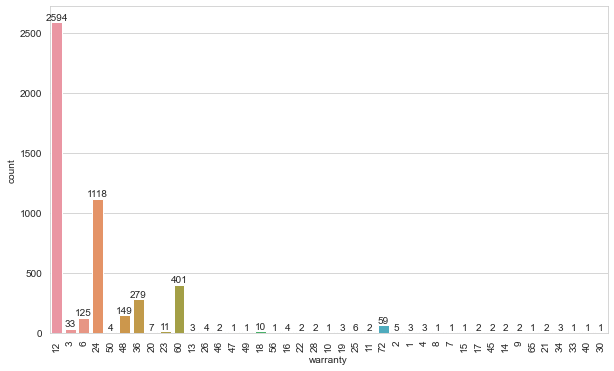

In [121]:
ax = sns.countplot(data=df, x="warranty")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">full_service</p>

In [122]:
# Checking the count of body types in each categories and visualize it with countplot
df.full_service.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n80 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n84 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]           1
[\n, \n, \n, 4.9 l/100 km (comb), \n, 6.2 l/100 km (city), \n, 4.1 l/100 km (country), \n]       1
[\n, \n, \

In [123]:
df["full_service"] = df["full_service"].apply(lambda item: item[0] if type(item) == list else item)
df["full_service"]

0         \n
1        NaN
2        NaN
3         \n
4         \n
        ... 
15914    NaN
15915    NaN
15916     \n
15917    NaN
15918    NaN
Name: full_service, Length: 15919, dtype: object

In [124]:
df["full_service"] = df["full_service"].str.strip("\n")
df["full_service"]

0           
1        NaN
2        NaN
3           
4           
        ... 
15914    NaN
15915    NaN
15916       
15917    NaN
15918    NaN
Name: full_service, Length: 15919, dtype: object

In [125]:
df.full_service.replace(to_replace='', value=np.nan, inplace=True)
df["full_service"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
15914   NaN
15915   NaN
15916   NaN
15917   NaN
15918   NaN
Name: full_service, Length: 15919, dtype: float64

In [126]:
df.full_service.value_counts(dropna=False)

NaN    15919
Name: full_service, dtype: int64

>all null values, 100%. good to drop column

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">non_smoking_vehicle</p>

In [127]:
df["non_smoking_vehicle"] = df0["Non-smoking Vehicle"].copy()

In [128]:
# Checking the count of body types in each categories and visualize it with countplot
df.non_smoking_vehicle.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
                                                                                              ... 
[\n, \n, \n, 5.6 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.7 l/100 km (country), \n]       1
[\n, \n, \n122 g CO2/km (comb)\n]                                                                1
[\n, \n, \n158 g CO2/km (comb)\n]                                                                1
[\n, \n, \n150 g CO2/km (comb)\n]                                                                1
[\n, \n, \

In [129]:
df.non_smoking_vehicle.apply(pd.Series)

,0,1,2,3,4,5,6,7,8
0,\n,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,\n,\n,\nEuro 6\n,NaN,NaN,NaN,NaN,NaN,NaN
4,\n,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,\n,\n,\n4 (Green)\n,NaN,NaN,NaN,NaN,NaN,NaN
15916,\n,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df["non_smoking_vehicle"] = df["non_smoking_vehicle"].apply(lambda item: item[0] if type(item) == list else item)
df["non_smoking_vehicle"]

0         \n
1        NaN
2        NaN
3         \n
4         \n
        ... 
15914    NaN
15915     \n
15916     \n
15917    NaN
15918    NaN
Name: non_smoking_vehicle, Length: 15919, dtype: object

In [131]:
df["non_smoking_vehicle"] = df["non_smoking_vehicle"].str.strip("\n")
df["non_smoking_vehicle"]

0           
1        NaN
2        NaN
3           
4           
        ... 
15914    NaN
15915       
15916       
15917    NaN
15918    NaN
Name: non_smoking_vehicle, Length: 15919, dtype: object

In [132]:
df.non_smoking_vehicle.replace(to_replace='', value=np.nan, inplace=True)

In [133]:
df.non_smoking_vehicle.value_counts(dropna=False)

NaN    15919
Name: non_smoking_vehicle, dtype: int64

>all null values, 100%. good to drop column

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">null</p>

In [134]:
# Checking the count of body types in each categories and visualize it with countplot
df.null.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]    15919
Name: null, dtype: int64

>all null values, 100%. good to drop column

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">make</p>

In [135]:
# Checking the count of body types in each categories and visualize it with countplot
df.make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: make, dtype: int64

>good to drop column, duplicate of 'make_model'

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">model</p>

In [136]:
# Checking the count of body types in each categories and visualize it with countplot
df.model.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: model, dtype: int64

>good to drop column, duplicate of 'make_model'

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">offer_number</p>

In [137]:
# Checking the count of body types in each categories and visualize it with countplot
df.offer_number.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                               3175
[\nLT67679\n]                                       27
[\nUN89904\n]                                       27
[\nXJ38068\n]                                       27
[\nJV03654\n]                                       27
                                                  ... 
[\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n]       1
[\n6701576\n]                                        1
[\n6701569\n]                                        1
[\n158121\n]                                         1
[\nRe_30000008029\n]                                 1
Name: offer_number, Length: 11441, dtype: int64

In [138]:
df["offer_number"] = df.offer_number.apply(pd.Series)
df["offer_number"]

0             \nLR-062483\n
1                       NaN
2              \nAM-95365\n
3                       NaN
4                 \nC1626\n
                ...        
15914          \n10988301\n
15915       \n507370_3223\n
15916          \nEspace16\n
15917           \n2691331\n
15918    \nRe_30000008029\n
Name: offer_number, Length: 15919, dtype: object

In [139]:
df.offer_number.value_counts(dropna=False)

NaN                                             3175
\nLT67679\n                                       27
\nUN89904\n                                       27
\nXJ38068\n                                       27
\nJV03654\n                                       27
                                                ... 
\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n       1
\n6701576\n                                        1
\n6701569\n                                        1
\n158121\n                                         1
\nRe_30000008029\n                                 1
Name: offer_number, Length: 11441, dtype: int64

>good to drop column, doesn't add any value to analysis

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">first_registration</p>

In [140]:
df["first_registration"] = df0["First Registration"].copy()

In [141]:
# Checking the count of body types in each categories and visualize it with countplot
df.first_registration.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: first_registration, dtype: int64

In [142]:
df.first_registration.apply(pd.Series)

,0,1,2
0,\n,2016,\n
1,\n,2017,\n
2,\n,2016,\n
3,\n,2016,\n
4,\n,2016,\n
...,...,...,...
15914,NaN,NaN,NaN
15915,\n,2019,\n
15916,\n,2019,\n
15917,\n,2019,\n


In [143]:
df["first_registration"] = df.first_registration.apply(pd.Series)[1]
df["first_registration"]

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914     NaN
15915    2019
15916    2019
15917    2019
15918    2019
Name: first_registration, Length: 15919, dtype: object

In [144]:
df.first_registration.value_counts(dropna=False)

2018    4522
2016    3674
2017    3273
2019    2853
NaN     1597
Name: first_registration, dtype: int64

In [145]:
df.registration.value_counts(dropna=False)

NaN        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [146]:
df[["registration", "first_registration"]].sample(10)

,registration,first_registration
243,04/2016,2016
1823,05/2018,2018
15701,08/2018,2018
3489,04/2016,2016
15338,04/2017,2017
1120,07/2018,2018
9990,05/2019,2019
832,03/2016,2016
8021,06/2019,2019
3154,03/2016,2016


>good to drop column, duplicate of 'registration'. also has the same null value count (1597)

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">body_color</p>

In [147]:
# Checking the count of body types in each categories and visualize it with countplot
df.body_color.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: body_color, dtype: int64

In [148]:
df["body_color"] = df.body_color.apply(pd.Series)[1]
df["body_color"]

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: body_color, Length: 15919, dtype: object

In [149]:
df.body_color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [150]:
df.body_color.isnull().sum()

597

In [151]:
df.body_color.isnull().sum() / df.body_color.shape[0]

0.037502355675607765

>minimal null value

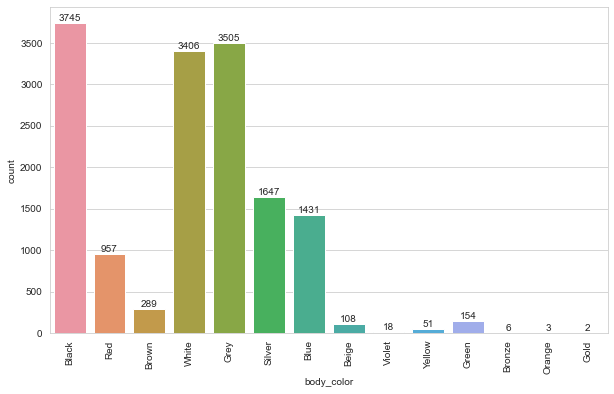

In [152]:
ax = sns.countplot(data=df, x="body_color")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> Black, white, grey, silver and blue are dominant

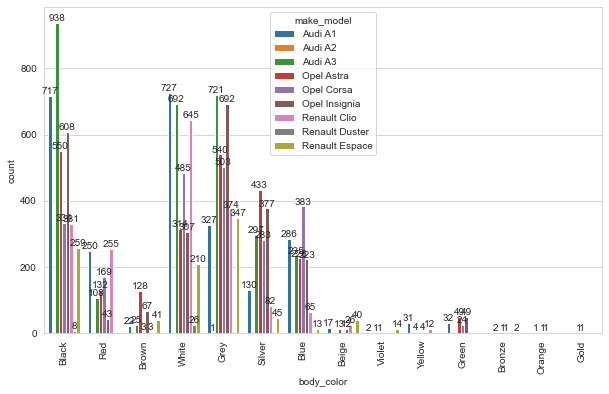

In [153]:
ax = sns.countplot(data = df, x = "body_color", hue = "make_model")

plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

> any value for analysis? any impact on car price? maybe bivariate analysis with price

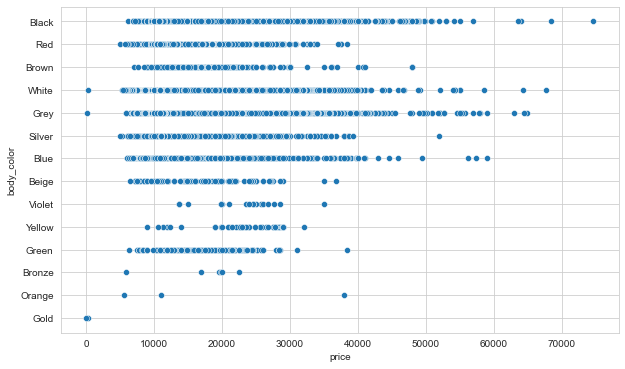

In [154]:
sns.scatterplot(data=df, x='price', y='body_color');

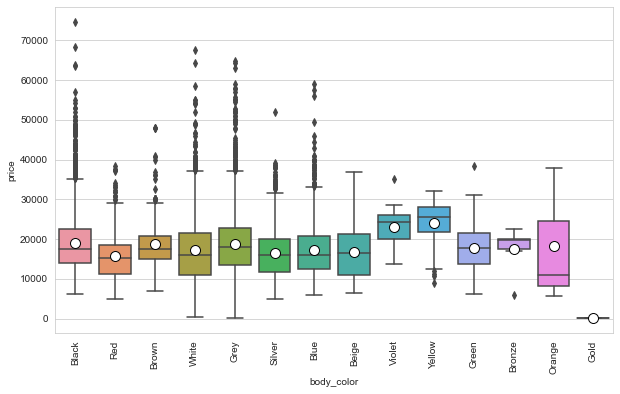

In [155]:
# plotting price by body_color to see extreme values
ax = sns.boxplot(data=df, 
            y="price",
            x="body_color",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

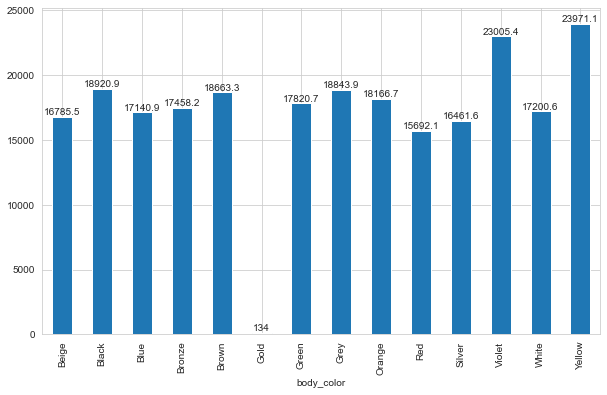

In [156]:
#plotting average price by body_color
ax = df.groupby("body_color").price.mean().plot(kind='bar')

plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">paint_type</p>

In [157]:
# Checking the count of body types in each categories and visualize it with countplot
df.paint_type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: paint_type, dtype: int64

In [158]:
df["paint_type"] = df["paint_type"].apply(lambda item: item[0] if type(item) == list else item)
df["paint_type"]

0        \nMetallic\n
1                 NaN
2        \nMetallic\n
3        \nMetallic\n
4        \nMetallic\n
             ...     
15914    \nMetallic\n
15915    \nMetallic\n
15916             NaN
15917             NaN
15918    \nMetallic\n
Name: paint_type, Length: 15919, dtype: object

In [159]:
df["paint_type"] = df["paint_type"].str.strip("\n")
df["paint_type"]

0        Metallic
1             NaN
2        Metallic
3        Metallic
4        Metallic
           ...   
15914    Metallic
15915    Metallic
15916         NaN
15917         NaN
15918    Metallic
Name: paint_type, Length: 15919, dtype: object

In [160]:
df.paint_type.value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [161]:
df.paint_type.isnull().sum() / df.paint_type.shape[0]

0.3625855895470821

>36% null value, any value for analysis? any impact on car price?. 'uni-basic' and 'perl-effect' are extreme values

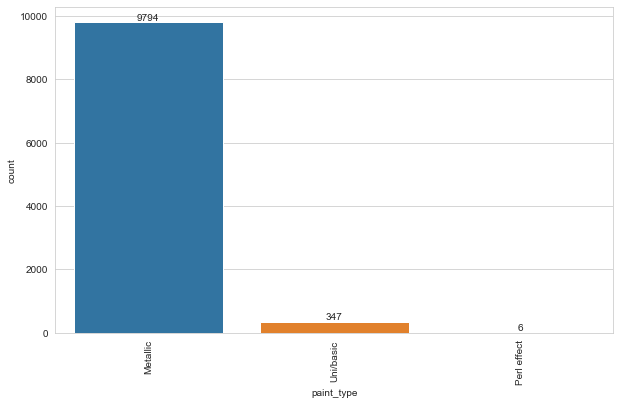

In [162]:
ax = sns.countplot(data=df, x="paint_type")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

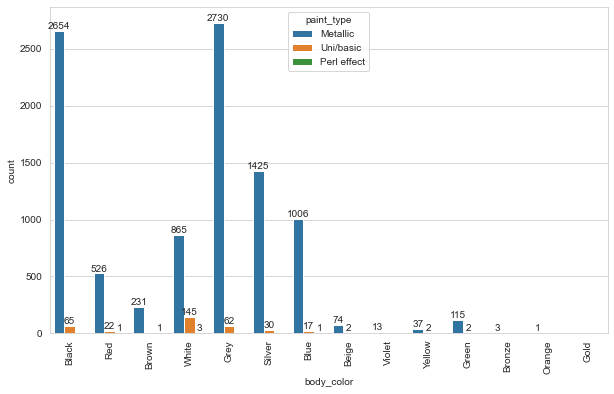

In [163]:
ax = sns.countplot(data = df, x = "body_color", hue = "paint_type")

plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">body_color_original</p>

In [164]:
# Checking the count of body types in each categories and visualize it with countplot
df.body_color_original.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nRouge-Braun (G0Y)\n]                   1
[\nVARI COLRI DISPONIBILI\n]              1
[\nKokosnussbraun Metallic\n]             1
[\nFarbe frei wählbar\n]                  1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: body_color_original, Length: 1928, dtype: int64

In [165]:
df["body_color_original"] = df["body_color_original"].apply(lambda item: item[0] if type(item) == list else item)
df["body_color_original"]

0                 \nMythosschwarz\n
1                               NaN
2        \nmythosschwarz metallic\n
3                               NaN
4        \nMythosschwarz Metallic\n
                    ...            
15914              \nGrigio scuro\n
15915       \nStahl-Grau Metallic\n
15916               \narktis-weiß\n
15917                    \nGrigio\n
15918    \nTitanium-Grau Metallic\n
Name: body_color_original, Length: 15919, dtype: object

In [166]:
df["body_color_original"] = df["body_color_original"].str.strip("\n")
df["body_color_original"]

0                 Mythosschwarz
1                           NaN
2        mythosschwarz metallic
3                           NaN
4        Mythosschwarz Metallic
                  ...          
15914              Grigio scuro
15915       Stahl-Grau Metallic
15916               arktis-weiß
15917                    Grigio
15918    Titanium-Grau Metallic
Name: body_color_original, Length: 15919, dtype: object

In [167]:
df.body_color_original.value_counts(dropna=False)

NaN                              3759
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: body_color_original, Length: 1928, dtype: int64

In [168]:
df.body_color_original.isnull().sum() / df.body_color_original.shape[0]

0.23613292292229413

>23% null value, could be used to fillna 'body_color'

In [169]:
df[["body_color","body_color_original"]]

,body_color,body_color_original
0,Black,Mythosschwarz
1,Red,NaN
2,Black,mythosschwarz metallic
3,Brown,NaN
4,Black,Mythosschwarz Metallic
...,...,...
15914,Grey,Grigio scuro
15915,Grey,Stahl-Grau Metallic
15916,White,arktis-weiß
15917,Grey,Grigio


In [170]:
df[df["body_color"].isnull()][["body_color","body_color_original"]]

,body_color,body_color_original
70,NaN,gris nano
122,NaN,wählbar
150,NaN,BLEU UTOPIA
195,NaN,BLEU UTOPIA
198,NaN,null
...,...,...
15690,NaN,NaN
15785,NaN,GNE NOIR ETOILE
15849,NaN,Farbe: Sonstige
15854,NaN,NaN


#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">upholstery</p>

In [171]:
# Checking the count of body types in each categories and visualize it with countplot
df.upholstery.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nVelour, Gre

In [172]:
df["upholstery"] = df["upholstery"].apply(lambda item: item[0] if type(item) == list else item)
df["upholstery"]

0               \nCloth, Black\n
1                \nCloth, Grey\n
2               \nCloth, Black\n
3                            NaN
4               \nCloth, Black\n
                  ...           
15914                        NaN
15915                  \nCloth\n
15916    \nFull leather, Black\n
15917           \nPart leather\n
15918    \nFull leather, Brown\n
Name: upholstery, Length: 15919, dtype: object

In [173]:
df["upholstery"] = df["upholstery"].str.strip("\n")
df["upholstery"]

0               Cloth, Black
1                Cloth, Grey
2               Cloth, Black
3                        NaN
4               Cloth, Black
                ...         
15914                    NaN
15915                  Cloth
15916    Full leather, Black
15917           Part leather
15918    Full leather, Brown
Name: upholstery, Length: 15919, dtype: object

In [174]:
df["upholstery"] = df["upholstery"].str.split(",")
df["upholstery"]

0               [Cloth,  Black]
1                [Cloth,  Grey]
2               [Cloth,  Black]
3                           NaN
4               [Cloth,  Black]
                  ...          
15914                       NaN
15915                   [Cloth]
15916    [Full leather,  Black]
15917            [Part leather]
15918    [Full leather,  Brown]
Name: upholstery, Length: 15919, dtype: object

In [175]:
df["upholstery"] = df["upholstery"].apply(lambda item: item[0] if type(item) == list else item)
df["upholstery"]

0               Cloth
1               Cloth
2               Cloth
3                 NaN
4               Cloth
             ...     
15914             NaN
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: upholstery, Length: 15919, dtype: object

In [176]:
df.upholstery.value_counts(dropna=False)

Cloth           8423
NaN             3720
Part leather    1499
Full leather    1009
Black            491
Other            368
Grey             273
Velour            60
alcantara         57
Brown             12
Beige              3
Blue               2
White              2
Name: upholstery, dtype: int64

> Cloth, leather, velour and alcantara are upholstery types. The rest can be classified as 'null'

In [177]:
df.upholstery.replace(to_replace=["Black", "Other", "Grey", "Brown", "Beige", "Blue", "White", "Other"], value=np.nan, inplace=True)

In [178]:
df.upholstery.value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery, dtype: int64

In [179]:
df.upholstery.isnull().sum() / df.upholstery.shape[0]

0.3059865569445317

>30% null values

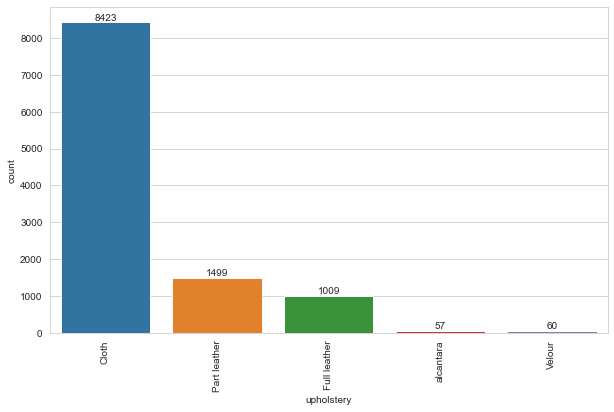

In [180]:
ax = sns.countplot(data=df, x="upholstery")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

>alcantara and velour are extreme types

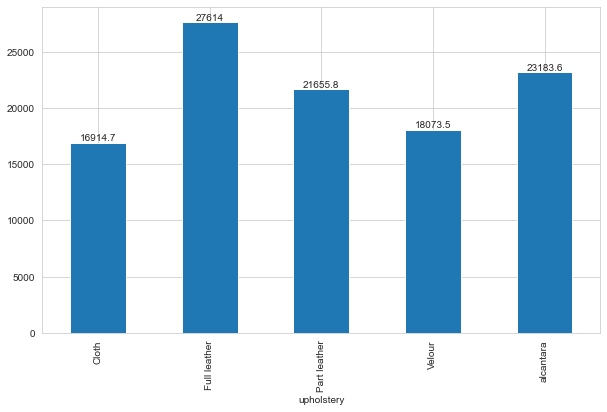

In [181]:
# plotting average price by upholstery 
ax = df.groupby("upholstery").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> leather is expensive

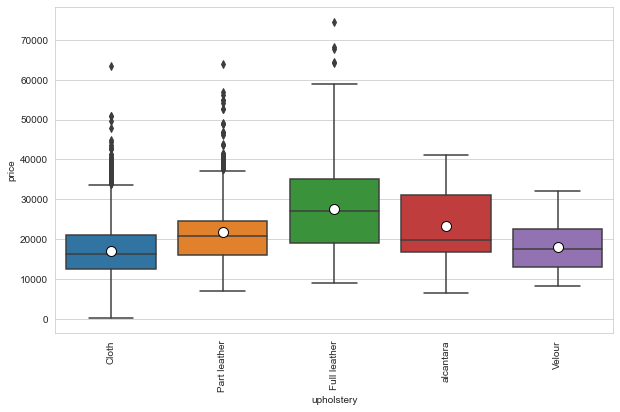

In [182]:
# plotting price by upholstery to see extreme values
ax = sns.boxplot(data=df, 
            y="price",
            x="upholstery",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">body</p>

In [183]:
df["body"] = df0["Body"].copy()

In [184]:
# Checking the count of body types in each categories and visualize it with countplot
df.body.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: body, dtype: int64

In [185]:
df["body"] = df["body"].apply(lambda item: item[1] if type(item) == list else item)
df["body"]

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: body, Length: 15919, dtype: object

In [186]:
df.body.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body, dtype: int64

In [187]:
# retrieve body_type count to compare 
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [188]:
df[["body_type", "body"]]

,body_type,body
0,Sedans,Sedans
1,Sedans,Sedans
2,Sedans,Sedans
3,Sedans,Sedans
4,Sedans,Sedans
...,...,...
15914,Van,Van
15915,Van,Van
15916,Van,Van
15917,Van,Van


In [189]:
(df["body_type"] == df["body"]).sum()

15859

> good to drop column, identical to 'body_type'

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">nr_of_doors</p>

In [190]:
# Checking the count of body types in each categories and visualize it with countplot
df.nr_of_doors.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: nr_of_doors, dtype: int64

In [191]:
df["nr_of_doors"] = df["nr_of_doors"].apply(lambda item: item[0] if type(item) == list else item)
df["nr_of_doors"]

0        \n5\n
1        \n3\n
2        \n4\n
3        \n3\n
4        \n5\n
         ...  
15914    \n5\n
15915    \n5\n
15916    \n5\n
15917    \n5\n
15918    \n5\n
Name: nr_of_doors, Length: 15919, dtype: object

In [192]:
df["nr_of_doors"] = df["nr_of_doors"].str.strip("\n")
df["nr_of_doors"]

0        5
1        3
2        4
3        3
4        5
        ..
15914    5
15915    5
15916    5
15917    5
15918    5
Name: nr_of_doors, Length: 15919, dtype: object

In [193]:
df.nr_of_doors.value_counts(dropna=False)

5      11575
4       3079
3        832
2        219
NaN      212
1          1
7          1
Name: nr_of_doors, dtype: int64

> minimal null values

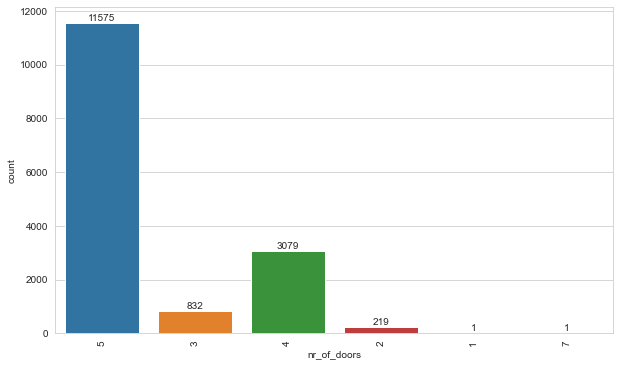

In [194]:
ax = sns.countplot(data=df, x="nr_of_doors")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> 1 and 7 seem like extreme values

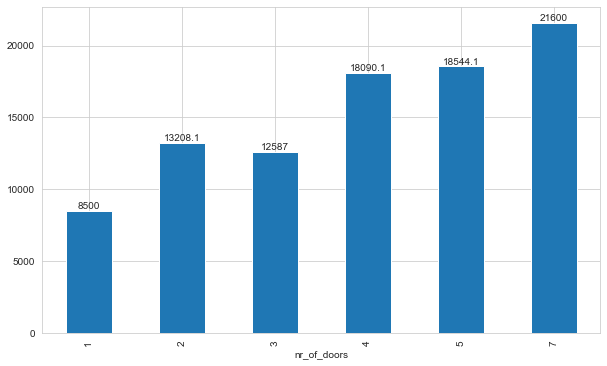

In [195]:
# plotting average price by nr_of_doors 
ax = df.groupby("nr_of_doors").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

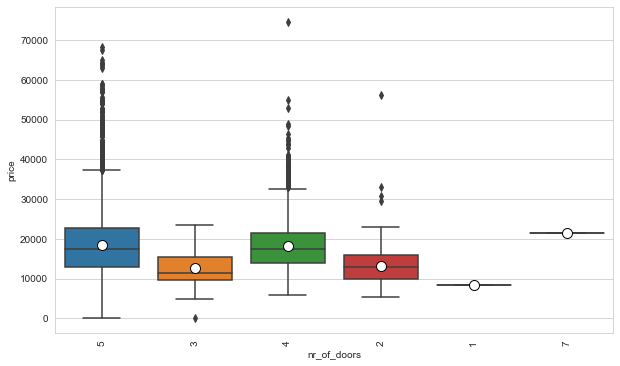

In [196]:
# plotting price by nr_of_doors to see extreme values
ax = sns.boxplot(data=df, 
            y="price",
            x="nr_of_doors",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">nr_of_seats</p>

In [197]:
# Checking the count of body types in each categories and visualize it with countplot
df.nr_of_seats.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: nr_of_seats, dtype: int64

In [198]:
df["nr_of_seats"] = df["nr_of_seats"].apply(lambda item: item[0] if type(item) == list else item)
df["nr_of_seats"]

0        \n5\n
1        \n4\n
2        \n4\n
3        \n4\n
4        \n5\n
         ...  
15914    \n5\n
15915    \n5\n
15916    \n7\n
15917    \n7\n
15918    \n5\n
Name: nr_of_seats, Length: 15919, dtype: object

In [199]:
df["nr_of_seats"] = df["nr_of_seats"].str.strip("\n")
df["nr_of_seats"]

0        5
1        4
2        4
3        4
4        5
        ..
15914    5
15915    5
15916    7
15917    7
15918    5
Name: nr_of_seats, Length: 15919, dtype: object

In [200]:
df.nr_of_seats.value_counts(dropna=False)

5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: nr_of_seats, dtype: int64

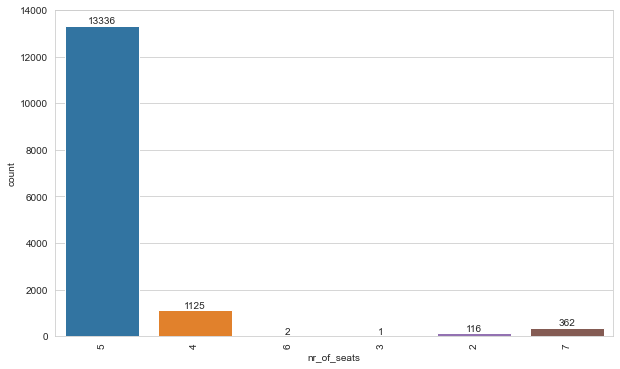

In [201]:
ax = sns.countplot(data=df, x="nr_of_seats")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> 3 and 6 seats seem like extreme values

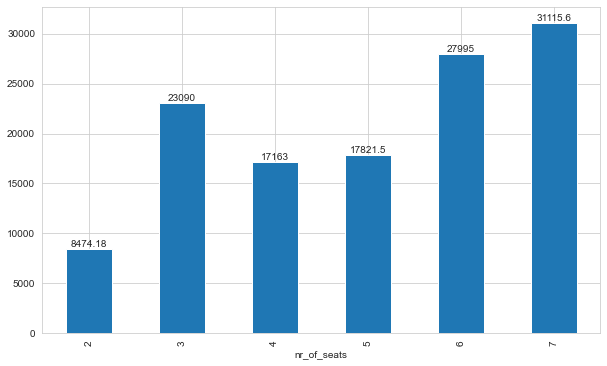

In [202]:
# plotting average price by nr_of_seats 
ax = df.groupby("nr_of_seats").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

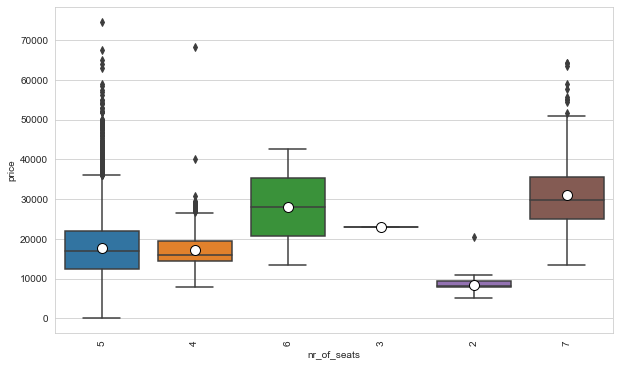

In [203]:
# plotting price by nr_of_seats to see extreme values
ax = sns.boxplot(data=df, 
            y="price",
            x="nr_of_seats",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">model_code</p>

In [204]:
# Checking the count of body types in each categories and visualize it with countplot
df.model_code.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/AVN\n]        1
[\n0035/BEM\n]        1
[\n0035/BAG\n]        1
[\n0035/BAA\n]        1
[\n3333/BKG\n]        1
Name: model_code, Length: 233, dtype: int64

In [205]:
df["model_code"] = df["model_code"].apply(lambda item: item[0] if type(item) == list else item)
df["model_code"]

0        \n0588/BDF\n
1        \n0588/BCY\n
2                 NaN
3                 NaN
4        \n0588/BDF\n
             ...     
15914             NaN
15915    \n0000/000\n
15916             NaN
15917             NaN
15918    \n3333/BHJ\n
Name: model_code, Length: 15919, dtype: object

In [206]:
df["model_code"] = df["model_code"].str.strip("\n")
df["model_code"]

0        0588/BDF
1        0588/BCY
2             NaN
3             NaN
4        0588/BDF
           ...   
15914         NaN
15915    0000/000
15916         NaN
15917         NaN
15918    3333/BHJ
Name: model_code, Length: 15919, dtype: object

In [207]:
df.model_code.value_counts(dropna=False)

NaN         10941
0035/BCB      268
0588/BNO      245
0588/BDB      206
0588/BHX      188
            ...  
0035/AVN        1
0035/BEM        1
0035/BAG        1
0035/BAA        1
3333/BKG        1
Name: model_code, Length: 233, dtype: int64

In [208]:
df.model_code.isnull().sum() / df.model_code.shape[0]

0.6872919153213142

>68% null values, good to drop column. any value to analysis?

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">gearing_type</p>

In [209]:
df["gearing_type"] = df0["Gearing Type"].copy()

In [210]:
# Checking the count of body types in each categories and visualize it with countplot
df.gearing_type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: gearing_type, dtype: int64

In [211]:
df["gearing_type"].apply(pd.Series)

,0,1,2
0,\n,Automatic,\n
1,\n,Automatic,\n
2,\n,Automatic,\n
3,\n,Automatic,\n
4,\n,Automatic,\n
...,...,...,...
15914,\n,Automatic,\n
15915,\n,Automatic,\n
15916,\n,Automatic,\n
15917,\n,Automatic,\n


In [212]:
df["gearing_type"] = df.gearing_type.apply(pd.Series)[1]
df["gearing_type"]

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15914    Automatic
15915    Automatic
15916    Automatic
15917    Automatic
15918    Automatic
Name: gearing_type, Length: 15919, dtype: object

In [213]:
df.gearing_type.value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

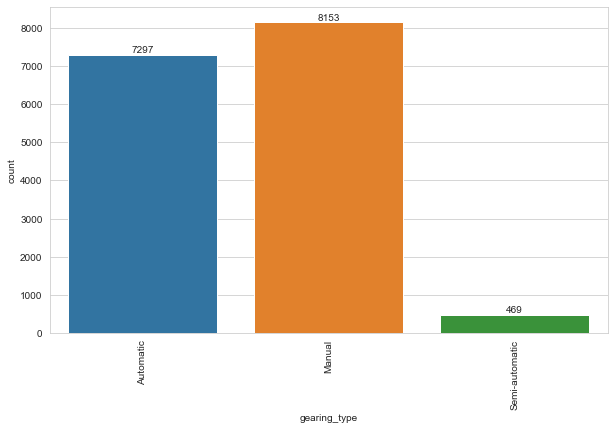

In [214]:
ax = sns.countplot(data=df, x="gearing_type")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

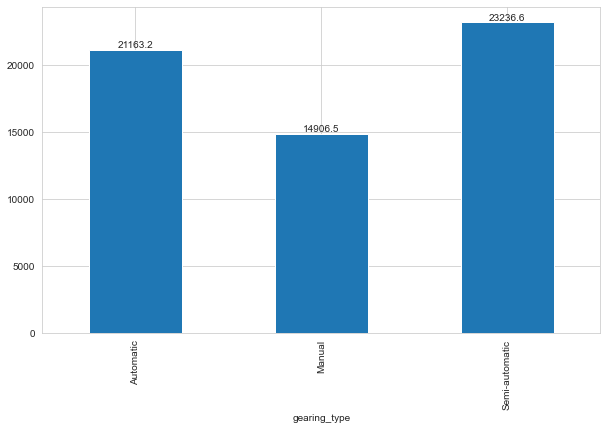

In [215]:
# plotting average price by gearing_type 
ax = df.groupby("gearing_type").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

>automatic cars are expensive

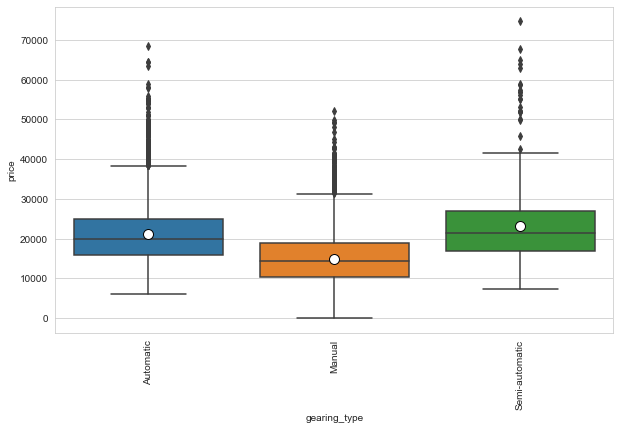

In [216]:
# plotting price by gearing_type to see extreme values
ax = sns.boxplot(data=df, 
            y="price",
            x="gearing_type",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

> all gearing types has extreme values

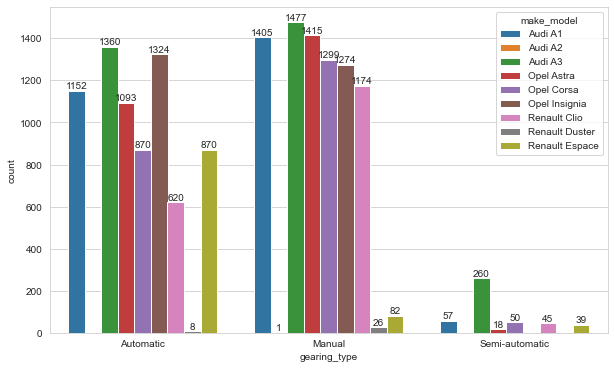

In [217]:
ax = sns.countplot(data = df, x = "gearing_type", hue = "make_model")

#plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">displacement</p>

In [218]:
df["displacement"] = df0["Displacement"].copy()

In [219]:
# Checking the count of body types in each categories and visualize it with countplot
df.displacement.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]    4761
[\n999 cc\n]      2438
[\n1,398 cc\n]    1314
[\n1,399 cc\n]     749
[\n1,229 cc\n]     677
                  ... 
[\n122 cc\n]         1
[\n1,198 cc\n]       1
[\n1,195 cc\n]       1
[\n2,967 cc\n]       1
[\n1,800 cc\n]       1
Name: displacement, Length: 78, dtype: int64

In [220]:
df["displacement"] = df["displacement"].apply(lambda item: item[0] if type(item) == list else item)
df["displacement"]

0        \n1,422 cc\n
1        \n1,798 cc\n
2        \n1,598 cc\n
3        \n1,422 cc\n
4        \n1,422 cc\n
             ...     
15914    \n1,997 cc\n
15915    \n1,798 cc\n
15916    \n1,997 cc\n
15917    \n1,997 cc\n
15918    \n1,798 cc\n
Name: displacement, Length: 15919, dtype: object

In [221]:
df["displacement"] = df["displacement"].str.strip("\n")
df["displacement"]

0        1,422 cc
1        1,798 cc
2        1,598 cc
3        1,422 cc
4        1,422 cc
           ...   
15914    1,997 cc
15915    1,798 cc
15916    1,997 cc
15917    1,997 cc
15918    1,798 cc
Name: displacement, Length: 15919, dtype: object

In [222]:
df["displacement"] = df["displacement"].str.strip(" cc")
df["displacement"]

0        1,422
1        1,798
2        1,598
3        1,422
4        1,422
         ...  
15914    1,997
15915    1,798
15916    1,997
15917    1,997
15918    1,798
Name: displacement, Length: 15919, dtype: object

In [223]:
df["displacement"] = df.displacement.str.replace(',', '')
df["displacement"]

0        1422
1        1798
2        1598
3        1422
4        1422
         ... 
15914    1997
15915    1798
15916    1997
15917    1997
15918    1798
Name: displacement, Length: 15919, dtype: object

In [224]:
#converting to float
df["displacement"] = df.displacement.astype('float64')
df.displacement.dtype

dtype('float64')

In [225]:
#changing column name to 'displacement_cc'
df.rename(columns={'displacement':'displacement_cc'}, inplace=True)

In [226]:
df.displacement_cc.value_counts(dropna=False)

1598.000    4761
999.000     2438
1398.000    1314
1399.000     749
1229.000     677
            ... 
122.000        1
1198.000       1
1195.000       1
2967.000       1
1800.000       1
Name: displacement_cc, Length: 78, dtype: int64

In [227]:
df.displacement_cc.isnull().sum()

496

>minimal null values

In [228]:
#Checking the statistical values
df.displacement_cc.describe()

count   15423.000
mean     1423.541
std       333.531
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: displacement_cc, dtype: float64

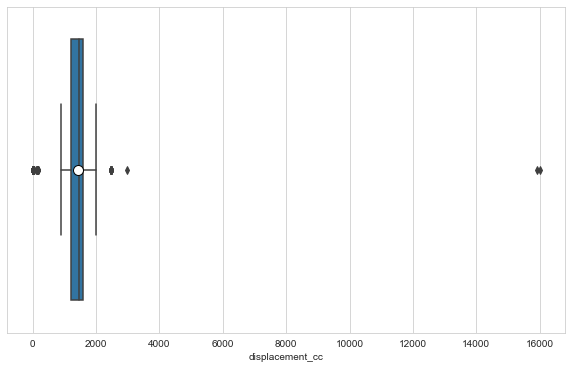

In [229]:
# Checking the boxplot to see extreme values
sns.boxplot(data=df, 
            x="displacement_cc",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

>extreme values

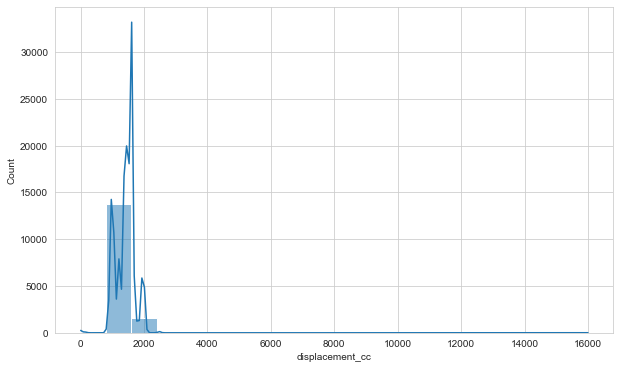

In [230]:
# Checking the histplot/kdeplot to see distribution of feature
sns.histplot(data=df, x="displacement_cc", bins=20, kde=True);

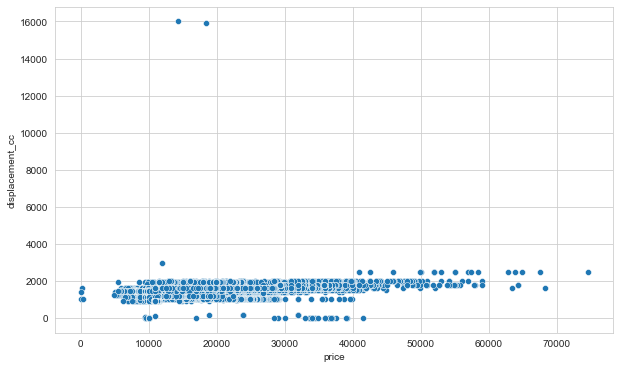

In [231]:
#checking the relationship between 'price' and 'displacement_cc'
sns.scatterplot(data=df, x='price', y='displacement_cc');

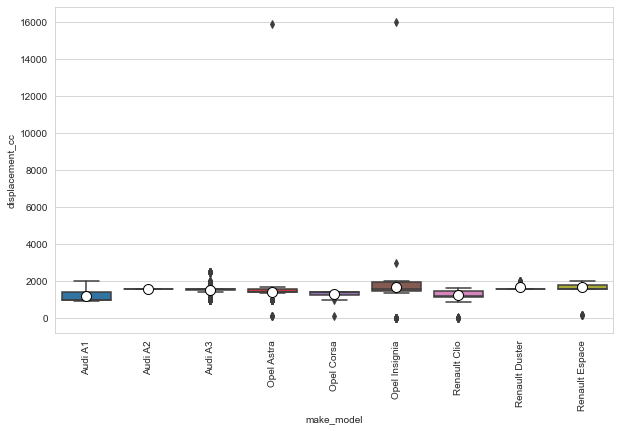

In [232]:
# plotting displacement_cc by make_model to see extreme values
ax = sns.boxplot(data=df, 
            y="displacement_cc",
            x="make_model",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">cylinders</p>

In [233]:
# Checking the count of body types in each categories and visualize it with countplot
df.cylinders.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: cylinders, dtype: int64

In [234]:
df["cylinders"] = df["cylinders"].apply(lambda item: item[0] if type(item) == list else item)
df["cylinders"]

0        \n3\n
1        \n4\n
2          NaN
3        \n3\n
4        \n3\n
         ...  
15914    \n4\n
15915    \n4\n
15916    \n4\n
15917    \n4\n
15918    \n4\n
Name: cylinders, Length: 15919, dtype: object

In [235]:
df["cylinders"] = df["cylinders"].str.strip("\n")
df["cylinders"]

0          3
1          4
2        NaN
3          3
4          3
        ... 
15914      4
15915      4
15916      4
15917      4
15918      4
Name: cylinders, Length: 15919, dtype: object

In [236]:
df.cylinders.value_counts(dropna=False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: cylinders, dtype: int64

In [237]:
df.cylinders.isnull().sum() / df.cylinders.shape[0]

0.3568063320560337

>5680 null values,35% 

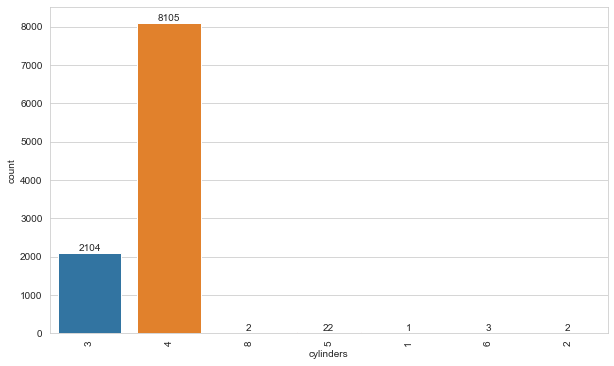

In [238]:
ax = sns.countplot(data=df, x="cylinders")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> excluding '3' and '4', rest can be considered as extreme

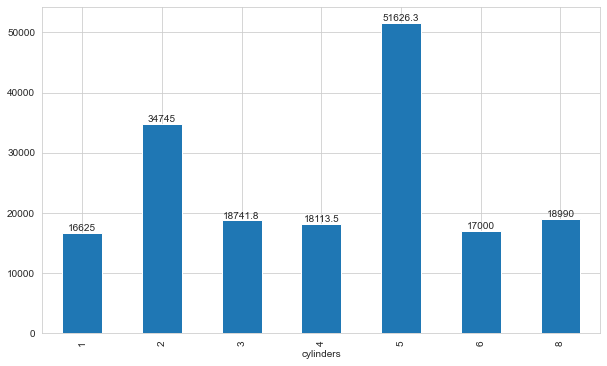

In [239]:
# plotting average price by cylinders 
ax = df.groupby("cylinders").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

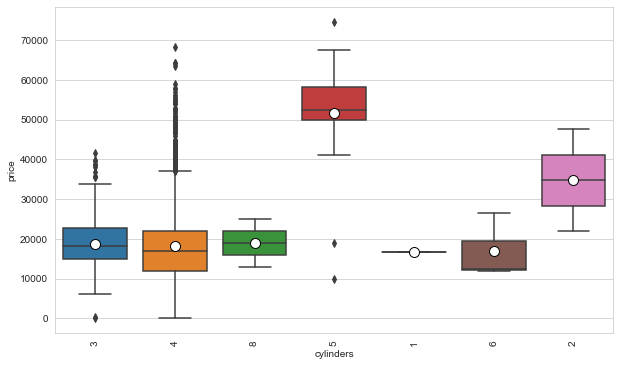

In [240]:
# plotting price by cylinders to see extreme values
ax = sns.boxplot(data=df, 
            y="price",
            x="cylinders",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">weight</p>

In [241]:
# Checking the count of body types in each categories and visualize it with countplot
df.weight.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,960 kg\n]       1
[\n1,258 kg\n]       1
[\n1,167 kg\n]       1
[\n1,331 kg\n]       1
[\n2,037 kg\n]       1
Name: weight, Length: 435, dtype: int64

In [242]:
df["weight"] = df["weight"].apply(lambda item: item[0] if type(item) == list else item)
df["weight"]

0        \n1,220 kg\n
1        \n1,255 kg\n
2                 NaN
3        \n1,195 kg\n
4                 NaN
             ...     
15914    \n1,758 kg\n
15915    \n1,708 kg\n
15916             NaN
15917    \n1,758 kg\n
15918    \n1,685 kg\n
Name: weight, Length: 15919, dtype: object

In [243]:
df["weight"] = df["weight"].str.strip("\n")
df["weight"]

0        1,220 kg
1        1,255 kg
2             NaN
3        1,195 kg
4             NaN
           ...   
15914    1,758 kg
15915    1,708 kg
15916         NaN
15917    1,758 kg
15918    1,685 kg
Name: weight, Length: 15919, dtype: object

In [244]:
df["weight"] = df["weight"].str.strip(" kg")
df["weight"]

0        1,220
1        1,255
2          NaN
3        1,195
4          NaN
         ...  
15914    1,758
15915    1,708
15916      NaN
15917    1,758
15918    1,685
Name: weight, Length: 15919, dtype: object

In [245]:
df["weight"] = df.weight.str.replace(',', '')
df["weight"]

0        1220
1        1255
2         NaN
3        1195
4         NaN
         ... 
15914    1758
15915    1708
15916     NaN
15917    1758
15918    1685
Name: weight, Length: 15919, dtype: object

In [246]:
#converting to float
df["weight"] = df.weight.astype('float64')
df.weight.dtype

dtype('float64')

In [247]:
#changing column name to 'weight_kg'
df.rename(columns={'weight':'weight_kg'}, inplace=True)

In [248]:
df.weight_kg.value_counts(dropna=False)

NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
            ... 
1960.000       1
1258.000       1
1167.000       1
1331.000       1
2037.000       1
Name: weight_kg, Length: 435, dtype: int64

In [249]:
df.weight_kg.isnull().sum() / df.weight_kg.shape[0]

0.43809284502795404

>6974 null value, 44% 

In [250]:
#Checking the statistical values
df.weight_kg.describe()

count   8945.000
mean    1351.107
std      220.662
min        1.000
25%     1165.000
50%     1288.000
75%     1487.000
max     2471.000
Name: weight_kg, dtype: float64

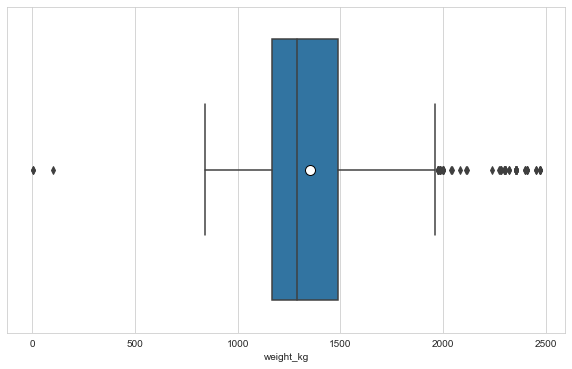

In [251]:
# Checking the boxplot to see extreme values
sns.boxplot(data=df, 
            x="weight_kg",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

>extreme values mainly on the upper side

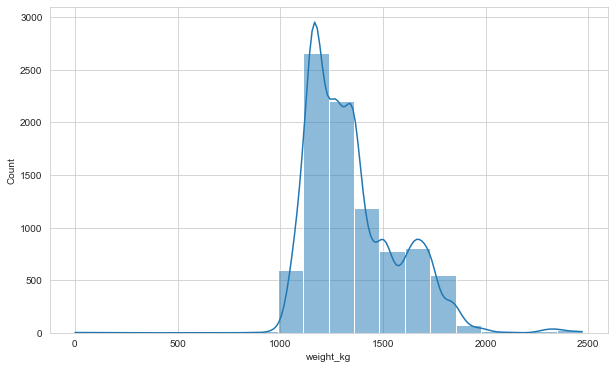

In [252]:
# Checking the histplot/kdeplot to see distribution of feature
sns.histplot(data=df, x="weight_kg", bins=20, kde=True);

>positively skewed dist

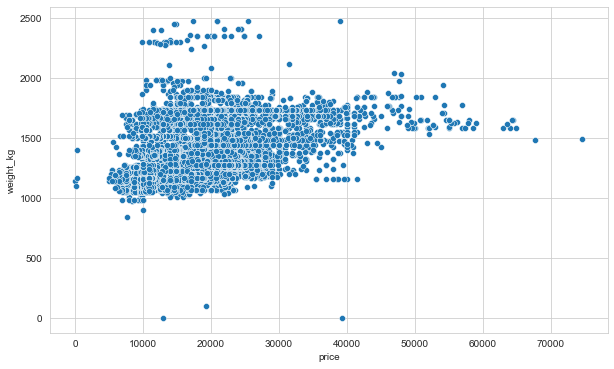

In [253]:
#checking the relationship between 'price' and 'weight_kg'
sns.scatterplot(data=df, x='price', y='weight_kg');

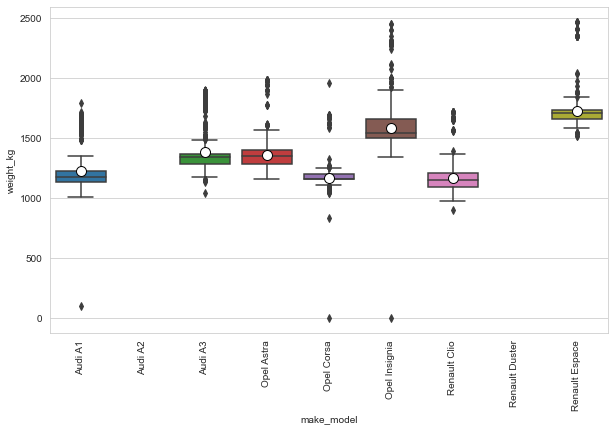

In [254]:
# plotting weight_kg by make_model to see extreme values
ax = sns.boxplot(data=df, 
            y="weight_kg",
            x="make_model",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

>all have extreme values

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">drive_chain</p>

In [255]:
# Checking the count of body types in each categories and visualize it with countplot
df.drive_chain.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: drive_chain, dtype: int64

In [256]:
df["drive_chain"] = df["drive_chain"].apply(lambda item: item[0] if type(item) == list else item)
df["drive_chain"]

0        \nfront\n
1        \nfront\n
2        \nfront\n
3              NaN
4        \nfront\n
           ...    
15914    \nfront\n
15915    \nfront\n
15916    \nfront\n
15917    \nfront\n
15918      \n4WD\n
Name: drive_chain, Length: 15919, dtype: object

In [257]:
df["drive_chain"] = df["drive_chain"].str.strip("\n")
df["drive_chain"]

0        front
1        front
2        front
3          NaN
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: drive_chain, Length: 15919, dtype: object

In [258]:
df.drive_chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [259]:
df.drive_chain.isnull().sum() / df.drive_chain.shape[0]

0.4308059551479364

>6858 null value, 43%

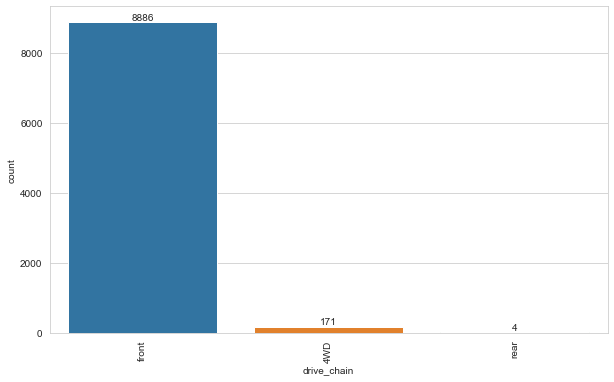

In [260]:
ax = sns.countplot(data=df, x="drive_chain")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> 'rear' and '4WD' are extreme

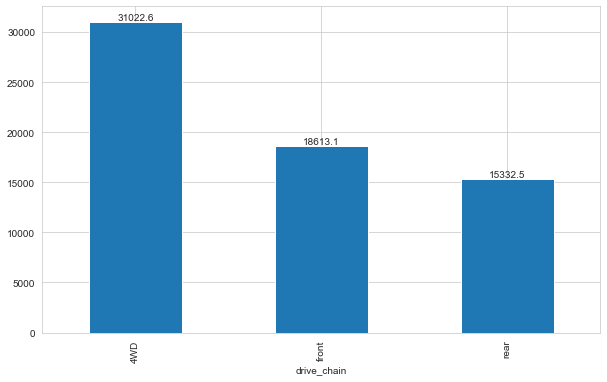

In [261]:
# plotting average price by drive_chain 
ax = df.groupby("drive_chain").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

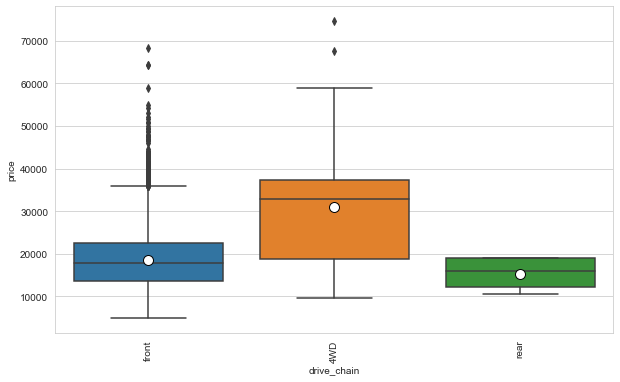

In [262]:
# plotting price by drive_chain to see extreme values
ax = sns.boxplot(data=df, 
            y="price",
            x="drive_chain",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">fuel</p>

In [263]:
df["fuel"] = df0["Fuel"].copy()

In [264]:
# Checking the count of body types in each categories and visualize it with countplot
df.fuel.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
                                                                                                                       ... 
[\n, Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91, \n]                                                          1
[\n, Super Plus 98 / Super E10 95, \n]                                                                                    1
[\n, Reg

In [265]:
df["fuel"].apply(pd.Series)

,0,1,2
0,\n,Diesel (Particulate Filter),\n
1,\n,Gasoline,\n
2,\n,Diesel (Particulate Filter),\n
3,\n,Diesel (Particulate Filter),\n
4,\n,Diesel (Particulate Filter),\n
...,...,...,...
15914,\n,Diesel (Particulate Filter),\n
15915,\n,Super 95 / Super Plus 98 (Particulate Filter),\n
15916,\n,Diesel,\n
15917,\n,Diesel,\n


In [266]:
df["fuel"] = df.fuel.apply(pd.Series)[1]
df["fuel"]

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: fuel, Length: 15919, dtype: object

In [270]:
#applying function
df["fuel"] = df.fuel.map(lambda x: fueltype(str(x)))

In [271]:
df.fuel.value_counts(dropna=False)

Benzine    8551
Diesel     7299
LPG/CNG      64
Hybrid        5
Name: fuel, dtype: int64

> no null values

In [272]:
#changing column name to 'fuel_type'
df.rename(columns={'fuel':'fuel_type'}, inplace=True)

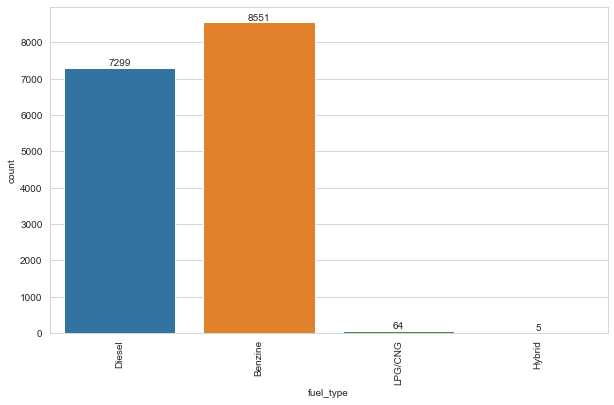

In [273]:
ax = sns.countplot(data=df, x="fuel_type")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

>'hybrid' and 'LPG' are extreme values

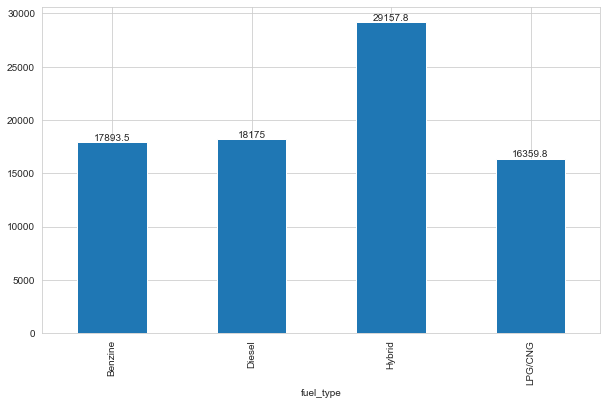

In [274]:
# plotting average price by fuel_type 
ax = df.groupby("fuel_type").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

>hybrid is rare but the most expensive type

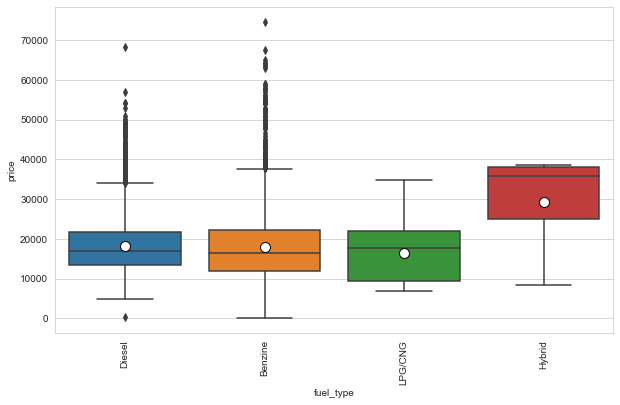

In [275]:
# plotting price by fuel_type to see extreme values
ax = sns.boxplot(data=df, 
            y="price",
            x="fuel_type",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

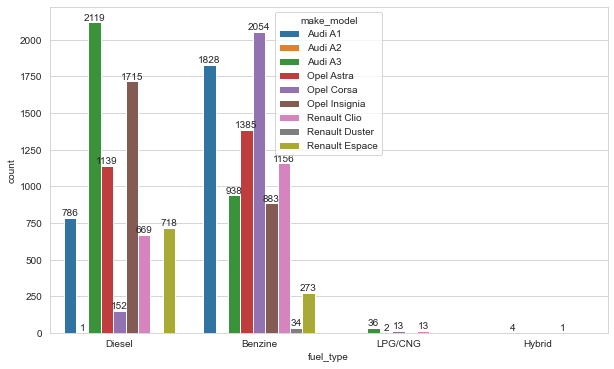

In [277]:
ax = sns.countplot(data = df, x = "fuel_type", hue = "make_model")

#plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">consumption</p>

In [278]:
df["consumption"] = df0["Consumption"].copy()

In [279]:
# Checking the count of body types in each categories and visualize it with countplot
df.consumption.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                 1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                 1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                    1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]         1

In [280]:
# splitting 'consumption' column into new columns
df.consumption.apply(pd.Series)

,0,1,2,3,4,5,6
0,[3.8 l/100 km (comb)],[4.3 l/100 km (city)],[3.5 l/100 km (country)],NaN,NaN,NaN,NaN
1,[5.6 l/100 km (comb)],[7.1 l/100 km (city)],[4.7 l/100 km (country)],NaN,NaN,NaN,NaN
2,[3.8 l/100 km (comb)],[4.4 l/100 km (city)],[3.4 l/100 km (country)],NaN,NaN,NaN,NaN
3,[3.8 l/100 km (comb)],[4.3 l/100 km (city)],[3.5 l/100 km (country)],NaN,NaN,NaN,NaN
4,[4.1 l/100 km (comb)],[4.6 l/100 km (city)],[3.8 l/100 km (country)],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
15914,[5.3 l/100 km (comb)],[6.2 l/100 km (city)],[4.7 l/100 km (country)],NaN,NaN,NaN,NaN
15915,\n,7.4 l/100 km (comb),\n,9.2 l/100 km (city),\n,6.3 l/100 km (country),\n
15916,[5.3 l/100 km (comb)],[6.2 l/100 km (city)],[4.7 l/100 km (country)],NaN,NaN,NaN,NaN
15917,[5.3 l/100 km (comb)],[6.2 l/100 km (city)],[4.7 l/100 km (country)],NaN,NaN,NaN,NaN


>will use 'comb' consumption values and create a new column. rows starting with "\n" in the first column have values shifted to right, need to filter and correct them

In [281]:
# filtering and creating a new column named "cons_comb"
df["cons_comb"] = df.consumption.apply(pd.Series)[0]
df["cons_comb"]

0        [3.8 l/100 km (comb)]
1        [5.6 l/100 km (comb)]
2        [3.8 l/100 km (comb)]
3        [3.8 l/100 km (comb)]
4        [4.1 l/100 km (comb)]
                 ...          
15914    [5.3 l/100 km (comb)]
15915                       \n
15916    [5.3 l/100 km (comb)]
15917    [5.3 l/100 km (comb)]
15918    [6.8 l/100 km (comb)]
Name: cons_comb, Length: 15919, dtype: object

In [282]:
# unpacking list
df["cons_comb"] = df.cons_comb.apply(pd.Series)
df["cons_comb"]

0        3.8 l/100 km (comb)
1        5.6 l/100 km (comb)
2        3.8 l/100 km (comb)
3        3.8 l/100 km (comb)
4        4.1 l/100 km (comb)
                ...         
15914    5.3 l/100 km (comb)
15915                     \n
15916    5.3 l/100 km (comb)
15917    5.3 l/100 km (comb)
15918    6.8 l/100 km (comb)
Name: cons_comb, Length: 15919, dtype: object

In [283]:
# splitting values in order to use first numeric part
df["cons_comb"] = df.cons_comb.str.split(" ")
df["cons_comb"]

0        [3.8, l/100, km, (comb)]
1        [5.6, l/100, km, (comb)]
2        [3.8, l/100, km, (comb)]
3        [3.8, l/100, km, (comb)]
4        [4.1, l/100, km, (comb)]
                   ...           
15914    [5.3, l/100, km, (comb)]
15915                        [\n]
15916    [5.3, l/100, km, (comb)]
15917    [5.3, l/100, km, (comb)]
15918    [6.8, l/100, km, (comb)]
Name: cons_comb, Length: 15919, dtype: object

In [284]:
# keeping the first numeric part
df["cons_comb"] = df["cons_comb"].apply(lambda item: item[0] if type(item) == list else item)
df["cons_comb"]

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915     \n
15916    5.3
15917    5.3
15918    6.8
Name: cons_comb, Length: 15919, dtype: object

In [285]:
# replacing "\n" with np.NaN
df.cons_comb.replace(to_replace="\n", value=np.nan, inplace=True)
df.cons_comb

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915    NaN
15916    5.3
15917    5.3
15918    6.8
Name: cons_comb, Length: 15919, dtype: object

In [286]:
#converting to float
df["cons_comb"] = pd.to_numeric(df.cons_comb)
df["cons_comb"]

0       3.800
1       5.600
2       3.800
3       3.800
4       4.100
         ... 
15914   5.300
15915     NaN
15916   5.300
15917   5.300
15918   6.800
Name: cons_comb, Length: 15919, dtype: float64

In [287]:
df.cons_comb.value_counts(dropna=False)

NaN       2883
3.900      732
4.000      712
5.400      663
5.100      630
          ... 
33.000       1
50.000       1
1.000        1
46.000       1
9.100        1
Name: cons_comb, Length: 72, dtype: int64

In [288]:
df.cons_comb.isnull().sum() / df.cons_comb.shape[0]

0.1811043407249199

> 2883 null values, %18

> rows starting with "\n" in the first column have values shifted to right, need to filter and correct them

In [289]:
# creating a copy
df["consumption2"] = df.consumption.copy()

# filtering and creating new series to clean
messy_rows = df[df.consumption2.apply(pd.Series)[0].isin(["\n"])]["consumption2"]

messy_rows = messy_rows.apply(pd.Series)
messy_rows

,0,1,2,3,4,5,6
61,\n,4.4 l/100 km (comb),\n,5.2 l/100 km (city),\n,3.9 l/100 km (country),\n
128,\n,5 l/100 km (comb),\n,6.2 l/100 km (city),\n,4.3 l/100 km (country),\n
155,\n,4.9 l/100 km (comb),\n,6.2 l/100 km (city),\n,4.2 l/100 km (country),\n
156,\n,4.9 l/100 km (comb),\n,6.2 l/100 km (city),\n,4.2 l/100 km (country),\n
164,\n,4.9 l/100 km (comb),\n,6.2 l/100 km (city),\n,4.2 l/100 km (country),\n
...,...,...,...,...,...,...,...
15492,\n,6.8 l/100 km (comb),\n,8.7 l/100 km (city),\n,5.7 l/100 km (country),\n
15690,\n,7.4 l/100 km (comb),\n,9.2 l/100 km (city),\n,6.3 l/100 km (country),\n
15889,\n,7.4 l/100 km (comb),\n,9.2 l/100 km (city),\n,6.3 l/100 km (country),\n
15907,\n,7.4 l/100 km (comb),\n,9.6 l/100 km (city),\n,6 l/100 km (country),\n


>only keep column 1 (comb), rest to be dropped

In [290]:
#dropping columns
messy_rows.drop(messy_rows.columns[[0,2,3,4,5,6]], axis=1, inplace=True)

# converting to pandas series
messy_rows = messy_rows.iloc[:,0]
messy_rows

61       4.4 l/100 km (comb)
128        5 l/100 km (comb)
155      4.9 l/100 km (comb)
156      4.9 l/100 km (comb)
164      4.9 l/100 km (comb)
                ...         
15492    6.8 l/100 km (comb)
15690    7.4 l/100 km (comb)
15889    7.4 l/100 km (comb)
15907    7.4 l/100 km (comb)
15915    7.4 l/100 km (comb)
Name: 1, Length: 850, dtype: object

In [291]:
# splitting values in order to use first numeric part
messy_rows= messy_rows.str.split(" ")
messy_rows

61       [4.4, l/100, km, (comb)]
128        [5, l/100, km, (comb)]
155      [4.9, l/100, km, (comb)]
156      [4.9, l/100, km, (comb)]
164      [4.9, l/100, km, (comb)]
                   ...           
15492    [6.8, l/100, km, (comb)]
15690    [7.4, l/100, km, (comb)]
15889    [7.4, l/100, km, (comb)]
15907    [7.4, l/100, km, (comb)]
15915    [7.4, l/100, km, (comb)]
Name: 1, Length: 850, dtype: object

In [292]:
# keeping the first numeric part
messy_rows = messy_rows.apply(lambda item: item[0] if type(item) == list else item)
messy_rows

61       4.4
128        5
155      4.9
156      4.9
164      4.9
        ... 
15492    6.8
15690    7.4
15889    7.4
15907    7.4
15915    7.4
Name: 1, Length: 850, dtype: object

In [293]:
#converting to float
messy_rows = pd.to_numeric(messy_rows)
messy_rows

61      4.400
128     5.000
155     4.900
156     4.900
164     4.900
         ... 
15492   6.800
15690   7.400
15889   7.400
15907   7.400
15915   7.400
Name: 1, Length: 850, dtype: float64

In [294]:
messy_rows.value_counts(dropna=False)

5.400    107
5.900     61
6.000     53
5.600     50
4.700     47
4.900     45
6.100     40
6.300     40
5.700     40
5.500     38
5.000     32
6.200     32
6.600     29
4.400     28
5.100     27
4.200     27
5.200     25
4.800     23
5.800     22
4.300     12
4.500     12
6.400     11
6.700     10
6.500      7
4.600      6
6.900      6
5.300      5
7.400      4
1.600      3
6.800      2
3.900      1
4.100      1
4.000      1
7.000      1
8.600      1
7.900      1
Name: 1, dtype: int64

> no null values in 'messy rows'

In [295]:
df.cons_comb

0       3.800
1       5.600
2       3.800
3       3.800
4       4.100
         ... 
15914   5.300
15915     NaN
15916   5.300
15917   5.300
15918   6.800
Name: cons_comb, Length: 15919, dtype: float64

In [296]:
#converting null values to 0 so that combine function works
df.cons_comb.replace(to_replace=np.nan, value=0, inplace=True)
df.cons_comb

0       3.800
1       5.600
2       3.800
3       3.800
4       4.100
         ... 
15914   5.300
15915   0.000
15916   5.300
15917   5.300
15918   6.800
Name: cons_comb, Length: 15919, dtype: float64

In [297]:
messy_rows

61      4.400
128     5.000
155     4.900
156     4.900
164     4.900
         ... 
15492   6.800
15690   7.400
15889   7.400
15907   7.400
15915   7.400
Name: 1, Length: 850, dtype: float64

In [298]:
# combining with messy rows per max function
df.cons_comb = df.cons_comb.combine(messy_rows, max)
df.cons_comb

0       3.800
1       5.600
2       3.800
3       3.800
4       4.100
         ... 
15914   5.300
15915   7.400
15916   5.300
15917   5.300
15918   6.800
Name: cons_comb, Length: 15919, dtype: float64

In [299]:
#converting remaining 0 values back to null 
df.cons_comb.replace(to_replace=0, value=np.nan, inplace=True)
df.cons_comb

0       3.800
1       5.600
2       3.800
3       3.800
4       4.100
         ... 
15914   5.300
15915   7.400
15916   5.300
15917   5.300
15918   6.800
Name: cons_comb, Length: 15919, dtype: float64

In [300]:
df.cons_comb.value_counts(dropna=False)

NaN       2035
5.400      770
3.900      733
4.000      713
5.100      657
          ... 
33.000       1
50.000       1
1.000        1
46.000       1
13.800       1
Name: cons_comb, Length: 72, dtype: int64

In [301]:
df.cons_comb.isnull().sum() / df.cons_comb.shape[0]

0.12783466298134305

>2035 null values,13%

In [302]:
#Checking the statistical values
df.cons_comb.describe()

count   13884.000
mean        4.896
std         1.634
min         1.000
25%         4.100
50%         4.800
75%         5.500
max        55.000
Name: cons_comb, dtype: float64

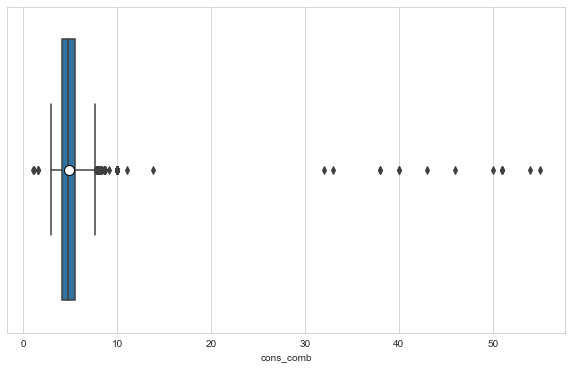

In [303]:
# Checking the boxplot to see extreme values
sns.boxplot(data=df, 
            x="cons_comb",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

>extreme values

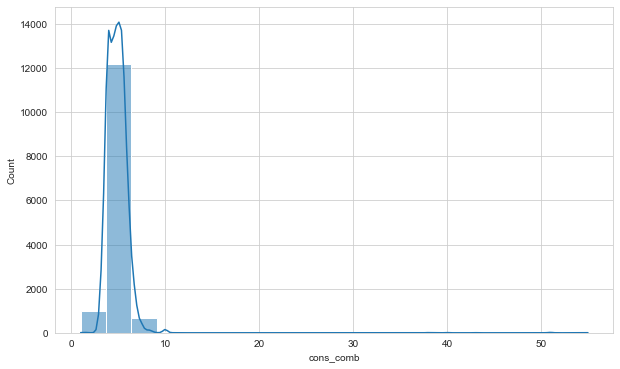

In [304]:
# Checking the histplot/kdeplot to see distribution of feature
sns.histplot(data=df, x="cons_comb", bins=20, kde=True);

>very positively skewed

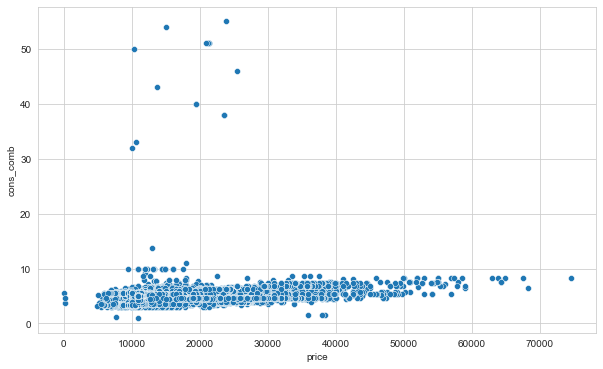

In [305]:
#checking the relationship between 'price' and 'cons_comb'
sns.scatterplot(data=df, x='price', y='cons_comb');

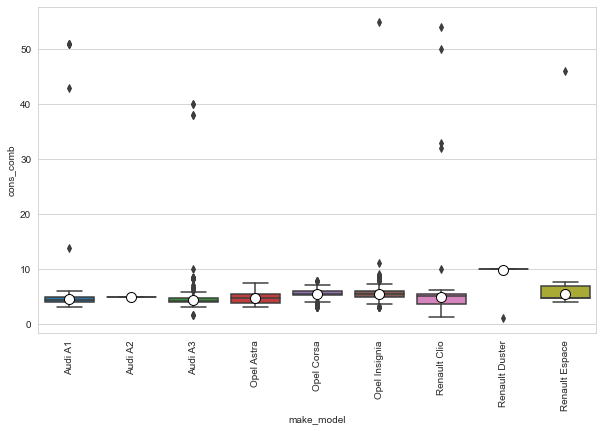

In [306]:
# plotting cons_comb by make_model to see extreme values
ax = sns.boxplot(data=df, 
            y="cons_comb",
            x="make_model",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">CO2_emission</p>

In [307]:
# Checking the count of body types in each categories and visualize it with countplot
df.CO2_emission.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                            1808
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
                               ... 
[\n14 g CO2/km (comb)\n]          1
[\n1,060 g CO2/km (comb)\n]       1
[\n51 g CO2/km (comb)\n]          1
[\n165 g CO2/km (comb)\n]         1
[\n193 g CO2/km (comb)\n]         1
Name: CO2_emission, Length: 124, dtype: int64

In [308]:
df["CO2_emission"] = df["CO2_emission"].apply(lambda item: item[0] if type(item) == list else item)
df["CO2_emission"]

0         \n99 g CO2/km (comb)\n
1        \n129 g CO2/km (comb)\n
2         \n99 g CO2/km (comb)\n
3         \n99 g CO2/km (comb)\n
4        \n109 g CO2/km (comb)\n
                  ...           
15914    \n139 g CO2/km (comb)\n
15915    \n168 g CO2/km (comb)\n
15916    \n139 g CO2/km (comb)\n
15917    \n139 g CO2/km (comb)\n
15918    \n153 g CO2/km (comb)\n
Name: CO2_emission, Length: 15919, dtype: object

In [309]:
df["CO2_emission"] = df["CO2_emission"].str.strip("\n")
df["CO2_emission"]

0         99 g CO2/km (comb)
1        129 g CO2/km (comb)
2         99 g CO2/km (comb)
3         99 g CO2/km (comb)
4        109 g CO2/km (comb)
                ...         
15914    139 g CO2/km (comb)
15915    168 g CO2/km (comb)
15916    139 g CO2/km (comb)
15917    139 g CO2/km (comb)
15918    153 g CO2/km (comb)
Name: CO2_emission, Length: 15919, dtype: object

In [310]:
# splitting values in order to use first numeric part
df["CO2_emission"] = df.CO2_emission.str.split(" ")
df["CO2_emission"]

0         [99, g, CO2/km, (comb)]
1        [129, g, CO2/km, (comb)]
2         [99, g, CO2/km, (comb)]
3         [99, g, CO2/km, (comb)]
4        [109, g, CO2/km, (comb)]
                   ...           
15914    [139, g, CO2/km, (comb)]
15915    [168, g, CO2/km, (comb)]
15916    [139, g, CO2/km, (comb)]
15917    [139, g, CO2/km, (comb)]
15918    [153, g, CO2/km, (comb)]
Name: CO2_emission, Length: 15919, dtype: object

In [311]:
# keeping the first numeric part
df["CO2_emission"] = df["CO2_emission"].apply(lambda item: item[0] if type(item) == list else item)
df["CO2_emission"]

0         99
1        129
2         99
3         99
4        109
        ... 
15914    139
15915    168
15916    139
15917    139
15918    153
Name: CO2_emission, Length: 15919, dtype: object

In [312]:
#removing ','
df["CO2_emission"] = df.CO2_emission.str.replace(',', '')
df["CO2_emission"]

0         99
1        129
2         99
3         99
4        109
        ... 
15914    139
15915    168
15916    139
15917    139
15918    153
Name: CO2_emission, Length: 15919, dtype: object

In [313]:
#converting to float
df["CO2_emission"] = pd.to_numeric(df.CO2_emission)
df["CO2_emission"]

0        99.000
1       129.000
2        99.000
3        99.000
4       109.000
          ...  
15914   139.000
15915   168.000
15916   139.000
15917   139.000
15918   153.000
Name: CO2_emission, Length: 15919, dtype: float64

In [314]:
df.CO2_emission.value_counts(dropna=False)

NaN         2436
120.000      740
99.000       545
97.000       537
104.000      501
            ... 
14.000         1
1060.000       1
51.000         1
165.000        1
193.000        1
Name: CO2_emission, Length: 123, dtype: int64

In [315]:
df.CO2_emission.isnull().sum() / df.CO2_emission.shape[0]

0.15302468748036938

>2436 null values, 15%

In [316]:
#Checking the statistical values
df.CO2_emission.describe()

count   13483.000
mean      123.740
std       269.952
min         0.000
25%       104.000
50%       116.000
75%       129.000
max     14457.000
Name: CO2_emission, dtype: float64

> std higher than mean indicates to extreme values

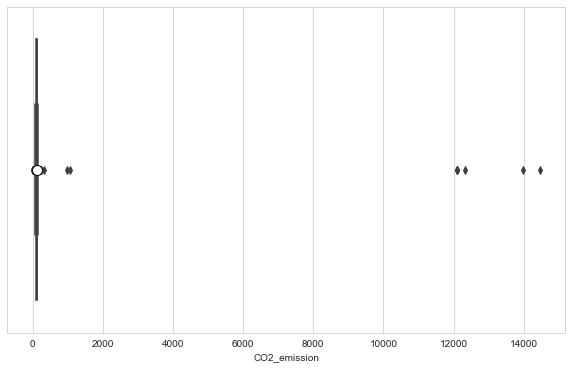

In [317]:
# Checking the boxplot to see extreme values
sns.boxplot(data=df, 
            x="CO2_emission",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

>extreme values

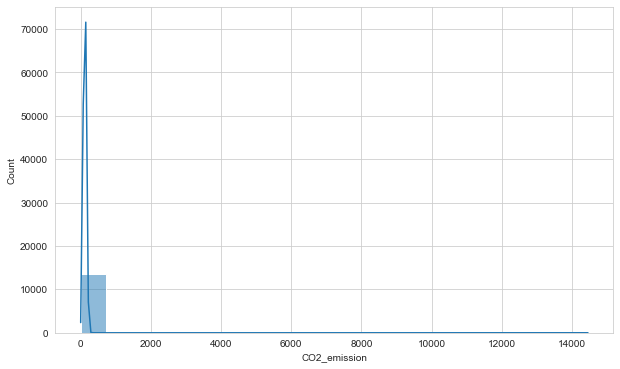

In [318]:
# Checking the histplot/kdeplot to see distribution of feature
sns.histplot(data=df, x="CO2_emission", bins=20, kde=True);

> very positively skewed

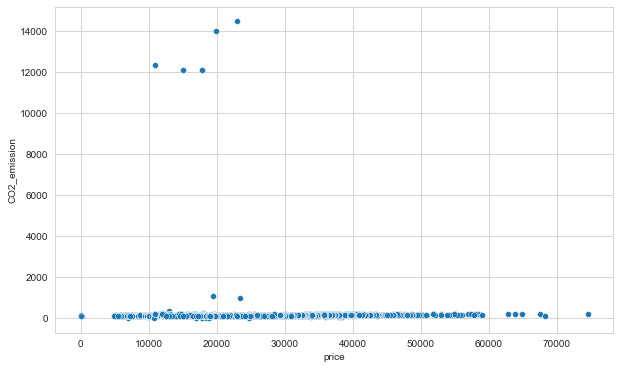

In [319]:
#checking the relationship between 'price' and 'CO2_emission'
sns.scatterplot(data=df, x='price', y='CO2_emission');

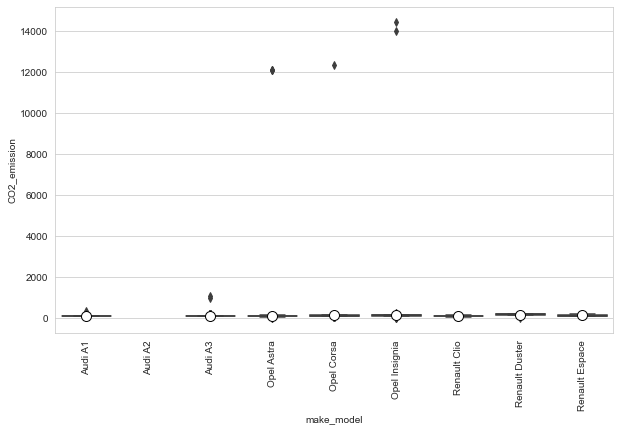

In [320]:
# plotting CO2_emission by make_model to see extreme values
ax = sns.boxplot(data=df, 
            y="CO2_emission",
            x="make_model",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">emission_class</p>

In [321]:
# Checking the count of body types in each categories and visualize it with countplot
df.emission_class.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [322]:
df["emission_class"] = df["emission_class"].apply(lambda item: item[0] if type(item) == list else item)
df["emission_class"]

0              \nEuro 6\n
1              \nEuro 6\n
2              \nEuro 6\n
3              \nEuro 6\n
4              \nEuro 6\n
               ...       
15914                 NaN
15915                 NaN
15916    \nEuro 6d-TEMP\n
15917          \nEuro 6\n
15918          \nEuro 6\n
Name: emission_class, Length: 15919, dtype: object

In [323]:
df["emission_class"] = df["emission_class"].str.strip("\n")
df["emission_class"]

0              Euro 6
1              Euro 6
2              Euro 6
3              Euro 6
4              Euro 6
             ...     
15914             NaN
15915             NaN
15916    Euro 6d-TEMP
15917          Euro 6
15918          Euro 6
Name: emission_class, Length: 15919, dtype: object

In [324]:
df.emission_class.value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [325]:
df.emission_class.isnull().sum() / df.emission_class.shape[0]

0.2279037627991708

> 3628 null values, 23%

In [326]:
#Checking the statistical values
df.emission_class.describe()

count      12291
unique         6
top       Euro 6
freq       10139
Name: emission_class, dtype: object

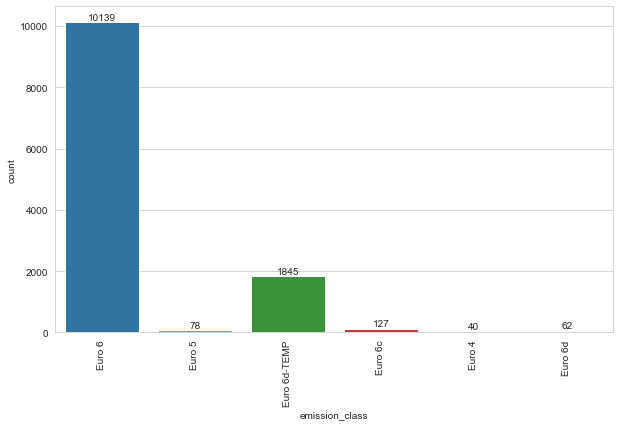

In [327]:
ax = sns.countplot(data=df, x="emission_class")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

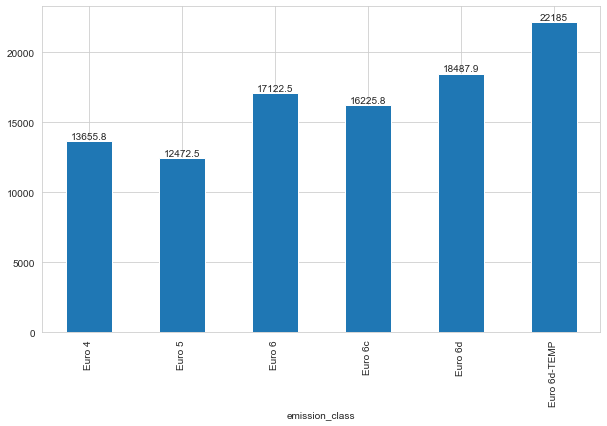

In [328]:
# plotting average price by emission_class 
ax = df.groupby("emission_class").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> Euro 6d and Euro 6d-TEMP are expensive

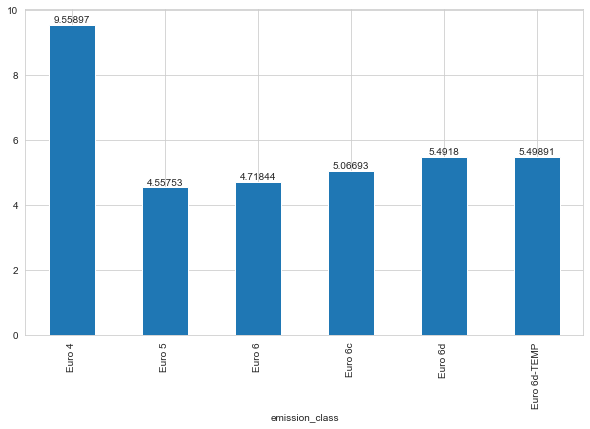

In [329]:
# plotting average cons_comb by emission_class 
ax = df.groupby("emission_class").cons_comb.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> Euro 6d and Euro 6d-TEMP have less CO2 emission values. Therefore they are expensive

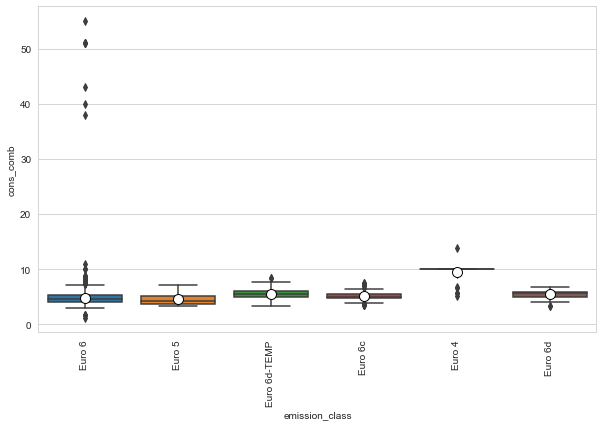

In [330]:
# plotting cons_comb by emission_class to see extreme values
ax = sns.boxplot(data=df, 
            y="cons_comb",
            x="emission_class",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

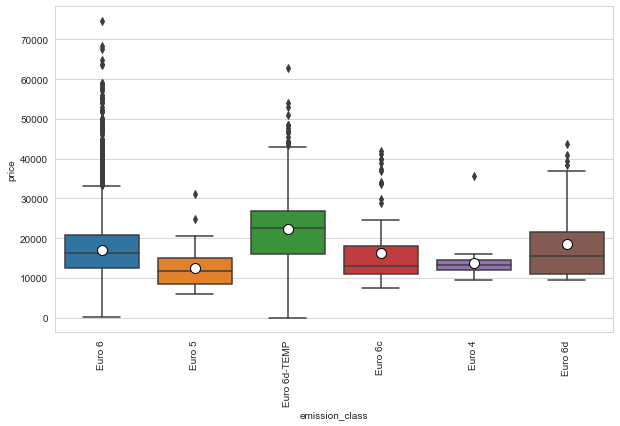

In [331]:
# plotting price by emission_class to see extreme values
ax = sns.boxplot(data=df, 
            y="price",
            x="emission_class",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">comfort_convenience</p>

In [332]:
df["comfort_convenience"] = df0["\nComfort & Convenience\n"].copy()
df["comfort_convenience"].sample(5)

13120    [Air conditioning, Automatic climate control, ...
14613                    [Air conditioning, Power windows]
3649     [Air conditioning, Armrest, Automatic climate ...
8054     [Air conditioning, Armrest, Cruise control, El...
4878     [Air conditioning, Automatic climate control, ...
Name: comfort_convenience, dtype: object

In [333]:
# Checking the count of body types in each categories and visualize it with countplot
df.comfort_convenience.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                

In [334]:
df.comfort_convenience.isnull().sum() / df.comfort_convenience.shape[0]

0.057792574910484326

>920 null values, 6%. minimal

In [335]:
# using series method to expand
df.comfort_convenience.apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop system,Tinted windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Air conditioning,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Seat heating,Start-stop system,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Air suspension,Armrest,Auxiliary heating,Electrical side mirrors,Heads-up display,Hill Holder,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Power windows,Rain sensor,Seat heating,Split rear seats,Start-stop system,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Air conditioning,Armrest,Automatic climate control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Start-stop system,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Electrical side mirrors,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Massage seats,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Split rear seats,Start-stop system,Tinted windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,Air conditioning,Automatic climate control,Cruise control,Electrically heated windshield,Electrical side mirrors,Electric tailgate,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Lumbar support,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Sunroof,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15916,Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically heated windshield,Electrical side mirrors,Electric tailgate,Heads-up display,Heated steering wheel,Leather steering wheel,Light sensor,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Sunroof,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15917,Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Electrical side mirrors,Leather steering wheel,Light sensor,Park Distance Control,Power windows,Start-stop system,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> must have a breakdown of all features.

In [336]:
# finding the row index number with maximum number of features (but not all features)
df.comfort_convenience.apply(lambda x: len(x) if type(x) == list else x).idxmax()

15615

In [337]:
# reading row#15615
df.comfort_convenience.apply(pd.Series).iloc[15615,:]

0                        Air conditioning
1                                 Armrest
2               Automatic climate control
3                       Auxiliary heating
4                          Cruise control
5           Electrically adjustable seats
6          Electrically heated windshield
7                 Electrical side mirrors
8                       Electric tailgate
9                        Heads-up display
10                  Heated steering wheel
11                            Hill Holder
12              Keyless central door lock
13                          Leather seats
14                 Leather steering wheel
15                           Light sensor
16                         Lumbar support
17                          Massage seats
18          Multi-function steering wheel
19                      Navigation system
20                          Panorama roof
21                  Park Distance Control
22           Parking assist system camera
23    Parking assist system self-s

In [338]:
# reading row#0
df.comfort_convenience.apply(pd.Series).iloc[0,:]

0                       Air conditioning
1                                Armrest
2              Automatic climate control
3                         Cruise control
4                Electrical side mirrors
5                            Hill Holder
6                 Leather steering wheel
7                           Light sensor
8          Multi-function steering wheel
9                      Navigation system
10                 Park Distance Control
11    Parking assist system sensors rear
12                         Power windows
13                           Rain sensor
14                          Seat heating
15                     Start-stop system
16                                   NaN
17                                   NaN
18                                   NaN
19                                   NaN
20                                   NaN
21                                   NaN
22                                   NaN
23                                   NaN
24              

In [339]:
#explode method
df["comfort_convenience"].explode()

0                 Air conditioning
0                          Armrest
0        Automatic climate control
0                   Cruise control
0          Electrical side mirrors
                   ...            
15918                  Hill Holder
15918       Leather steering wheel
15918            Navigation system
15918                Power windows
15918                 Seat heating
Name: comfort_convenience, Length: 185066, dtype: object

In [340]:
df["comfort_convenience"].explode()[56]

56           Air conditioning
56    Electrical side mirrors
56              Power windows
56          Start-stop system
Name: comfort_convenience, dtype: object

>need to dissect values and create new columns like 'cc_air_conditioning' and so on.

In [341]:
get_diff_category_column(df["comfort_convenience"])

{0: 'Air conditioning',
 1: 'Air suspension',
 2: 'Armrest',
 3: 'Automatic climate control',
 4: 'Auxiliary heating',
 5: 'Cruise control',
 6: 'Electric Starter',
 7: 'Electric tailgate',
 8: 'Electrical side mirrors',
 9: 'Electrically adjustable seats',
 10: 'Electrically heated windshield',
 11: 'Heads-up display',
 12: 'Heated steering wheel',
 13: 'Hill Holder',
 14: 'Keyless central door lock',
 15: 'Leather seats',
 16: 'Leather steering wheel',
 17: 'Light sensor',
 18: 'Lumbar support',
 19: 'Massage seats',
 20: 'Multi-function steering wheel',
 21: 'Navigation system',
 22: 'Panorama roof',
 23: 'Park Distance Control',
 24: 'Parking assist system camera',
 25: 'Parking assist system self-steering',
 26: 'Parking assist system sensors front',
 27: 'Parking assist system sensors rear',
 28: 'Power windows',
 29: 'Rain sensor',
 30: 'Seat heating',
 31: 'Seat ventilation',
 32: 'Split rear seats',
 33: 'Start-stop system',
 34: 'Sunroof',
 35: 'Tinted windows',
 36: 'Wind de

> in total there are 38 different features

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">entertainment_media</p>

In [342]:
# Checking the count of body types in each categories and visualize it with countplot
df.entertainment_media.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                           1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                              1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                          982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                               783
[On-board computer, Radio]                                                                                     487
                                                                                                              ... 
[Bluetooth, CD player, Digital radio, Hands-free equipment, Radio]                                               1
[CD player, Hands-free equipment, MP3, Radio, USB]                                                               1
[MP3, Radio, Sound system, USB]                                                 

In [343]:
df.entertainment_media.isnull().sum() / df.entertainment_media.shape[0]

0.0863119542684842

>1374 null values, 8%. minimal

In [344]:
# using series method to expand
df.entertainment_media.apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9
0,Bluetooth,Hands-free equipment,On-board computer,Radio,NaN,NaN,NaN,NaN,NaN,NaN
1,Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system,NaN,NaN,NaN,NaN,NaN
2,MP3,On-board computer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB,NaN,NaN
4,Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15914,Bluetooth,Digital radio,Hands-free equipment,On-board computer,Radio,USB,NaN,NaN,NaN,NaN
15915,Bluetooth,Digital radio,Hands-free equipment,Radio,USB,NaN,NaN,NaN,NaN,NaN
15916,Bluetooth,Hands-free equipment,On-board computer,Radio,NaN,NaN,NaN,NaN,NaN,NaN
15917,Bluetooth,Digital radio,Radio,USB,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
# finding the row index number with maximum number of features (but not all features)
df.entertainment_media.apply(lambda x: len(x) if type(x) == list else x).idxmax()

2821

In [346]:
# reading row#2821
df.entertainment_media.apply(pd.Series).iloc[2821,:]

0               Bluetooth
1               CD player
2           Digital radio
3    Hands-free equipment
4                     MP3
5       On-board computer
6                   Radio
7            Sound system
8              Television
9                     USB
Name: 2821, dtype: object

In [347]:
# reading row#0
df.entertainment_media.apply(pd.Series).iloc[0,:]

0               Bluetooth
1    Hands-free equipment
2       On-board computer
3                   Radio
4                     NaN
5                     NaN
6                     NaN
7                     NaN
8                     NaN
9                     NaN
Name: 0, dtype: object

In [348]:
#explode method
df["entertainment_media"].explode()

0                   Bluetooth
0        Hands-free equipment
0           On-board computer
0                       Radio
1                   Bluetooth
                 ...         
15917               Bluetooth
15917           Digital radio
15917                   Radio
15917                     USB
15918                     USB
Name: entertainment_media, Length: 69562, dtype: object

In [349]:
get_diff_category_column(df["entertainment_media"])

{0: 'Bluetooth',
 1: 'CD player',
 2: 'Digital radio',
 3: 'Hands-free equipment',
 4: 'MP3',
 5: 'On-board computer',
 6: 'Radio',
 7: 'Sound system',
 8: 'Television',
 9: 'USB'}

> in total there are 10 different features

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">extras</p>

In [350]:
# Checking the count of body types in each categories and visualize it with countplot
df.extras.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                                     3245
NaN                                                                                                                2962
[Alloy wheels, Touch screen]                                                                                        697
[Alloy wheels, Voice Control]                                                                                       577
[Alloy wheels, Touch screen, Voice Control]                                                                         541
                                                                                                                   ... 
[Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control]       1
[Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch]                             1
[Alloy wheels, Catalytic Converter, Ski 

In [351]:
df.extras.sample(10)

11689                                                  NaN
12506          [Alloy wheels, Touch screen, Voice Control]
6931                                                   NaN
12801    [Alloy wheels, Sport package, Sport seats, Spo...
15221                        [Alloy wheels, Voice Control]
6283                          [Touch screen, Winter tyres]
7571                                        [Touch screen]
1341     [Alloy wheels, Cab or rented Car, Sport seats,...
634                                                    NaN
14107                                                  NaN
Name: extras, dtype: object

In [352]:
df.extras.iloc[12866]

['Alloy wheels', 'Catalytic Converter', 'Roof rack', 'Touch screen']

In [353]:
df.extras.isnull().sum() / df.extras.shape[0]

0.18606696400527672

>2962 null values, 18%

In [354]:
# using series method to expand
df.extras.apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9
0,Alloy wheels,Catalytic Converter,Voice Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alloy wheels,Sport seats,Sport suspension,Voice Control,NaN,NaN,NaN,NaN,NaN,NaN
2,Alloy wheels,Voice Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alloy wheels,Sport seats,Voice Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alloy wheels,Sport package,Sport suspension,Voice Control,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15914,Alloy wheels,Touch screen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,Alloy wheels,Touch screen,Voice Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15916,Alloy wheels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15917,Alloy wheels,Touch screen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
# finding the row index number with maximum number of features (but not all features)
df.extras.apply(lambda x: len(x) if type(x) == list else x).idxmax()

3336

In [356]:
# reading row#3336
df.extras.apply(pd.Series).iloc[3336,:]

0           Alloy wheels
1    Catalytic Converter
2          Shift paddles
3          Sport package
4            Sport seats
5       Sport suspension
6           Touch screen
7              Tuned car
8          Voice Control
9           Winter tyres
Name: 3336, dtype: object

In [357]:
#explode method
df["extras"].explode()

0               Alloy wheels
0        Catalytic Converter
0              Voice Control
1               Alloy wheels
1                Sport seats
                ...         
15916           Alloy wheels
15917           Alloy wheels
15917           Touch screen
15918           Alloy wheels
15918           Touch screen
Name: extras, Length: 35481, dtype: object

In [358]:
get_diff_category_column(df["extras"])

{0: 'Alloy wheels',
 1: 'Cab or rented Car',
 2: 'Catalytic Converter',
 3: 'Handicapped enabled',
 4: 'Right hand drive',
 5: 'Roof rack',
 6: 'Shift paddles',
 7: 'Ski bag',
 8: 'Sliding door',
 9: 'Sport package',
 10: 'Sport seats',
 11: 'Sport suspension',
 12: 'Touch screen',
 13: 'Trailer hitch',
 14: 'Tuned car',
 15: 'Voice Control',
 16: 'Winter tyres'}

> in total there are 17 different features

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">safety_security</p>

In [359]:
# Checking the count of body types in each categories and visualize it with countplot
df.safety_security.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                  982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                        

In [360]:
df.safety_security.isnull().sum() / df.safety_security.shape[0]

0.06168729191532132

>920 null values, 6%

In [361]:
# using series method to expand
df.safety_security.apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABS,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side airbag,Electronic stability control,Head airbag,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABS,Alarm system,Central door lock with remote control,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency system,Head airbag,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS,Central door lock,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,ABS,Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability control,Emergency brake assistant,Head airbag,Immobilizer,Isofix,Lane departure warning system,LED Daytime Running Lights,LED Headlights,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,ABS,Adaptive Cruise Control,Blind spot monitor,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Emergency brake assistant,Immobilizer,Isofix,Lane departure warning system,LED Daytime Running Lights,LED Headlights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15916,ABS,Adaptive Cruise Control,Blind spot monitor,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Emergency brake assistant,Immobilizer,Isofix,Lane departure warning system,LED Daytime Running Lights,LED Headlights,Passenger-side airbag,Power steering,Side airbag,Traction control,Traffic sign recognition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15917,ABS,Blind spot monitor,Driver-side airbag,Electronic stability control,Emergency brake assistant,Isofix,LED Headlights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traffic sign recognition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [362]:
#explode method
df["safety_security"].explode()

0                                    ABS
0                      Central door lock
0                 Daytime running lights
0                     Driver-side airbag
0           Electronic stability control
                      ...               
15918              Passenger-side airbag
15918                     Power steering
15918                        Side airbag
15918    Tire pressure monitoring system
15918           Traffic sign recognition
Name: safety_security, Length: 192074, dtype: object

In [363]:
get_diff_category_column(df["safety_security"])

{0: 'ABS',
 1: 'Adaptive Cruise Control',
 2: 'Adaptive headlights',
 3: 'Alarm system',
 4: 'Blind spot monitor',
 5: 'Central door lock',
 6: 'Central door lock with remote control',
 7: 'Daytime running lights',
 8: 'Driver drowsiness detection',
 9: 'Driver-side airbag',
 10: 'Electronic stability control',
 11: 'Emergency brake assistant',
 12: 'Emergency system',
 13: 'Fog lights',
 14: 'Head airbag',
 15: 'Immobilizer',
 16: 'Isofix',
 17: 'LED Daytime Running Lights',
 18: 'LED Headlights',
 19: 'Lane departure warning system',
 20: 'Night view assist',
 21: 'Passenger-side airbag',
 22: 'Power steering',
 23: 'Rear airbag',
 24: 'Side airbag',
 25: 'Tire pressure monitoring system',
 26: 'Traction control',
 27: 'Traffic sign recognition',
 28: 'Xenon headlights'}

> in total there are 29 different features

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">description</p>

In [364]:
# Checking the count of body types in each categories and visualize it with countplot
df.description.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

>good to drop column, has info in German, Spanish ...   'short_description' covers 

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">emission_label</p>

In [365]:
df["emission_label"] = df0["Emission Label"].copy()

In [366]:
# Checking the count of body types in each categories and visualize it with countplot
df.emission_label.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: emission_label, dtype: int64

In [367]:
df["emission_label"] = df["emission_label"].apply(lambda item: item[0] if type(item) == list else item)
df["emission_label"]

0                  NaN
1        \n4 (Green)\n
2        \n4 (Green)\n
3                  NaN
4                  NaN
             ...      
15914              NaN
15915              NaN
15916              NaN
15917              NaN
15918    \n4 (Green)\n
Name: emission_label, Length: 15919, dtype: object

In [368]:
df["emission_label"] = df["emission_label"].str.strip("\n")
df["emission_label"]

0              NaN
1        4 (Green)
2        4 (Green)
3              NaN
4              NaN
           ...    
15914          NaN
15915          NaN
15916          NaN
15917          NaN
15918    4 (Green)
Name: emission_label, Length: 15919, dtype: object

In [369]:
df.emission_label.value_counts(dropna=False)

NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

In [370]:
df.emission_label.isnull().sum() / df.emission_label.shape[0]

0.7521829260631949

>11974 null values, 75%. good to drop column

In [371]:
#Checking the statistical values
df.emission_label.describe()

count          3945
unique            5
top       4 (Green)
freq           3553
Name: emission_label, dtype: object

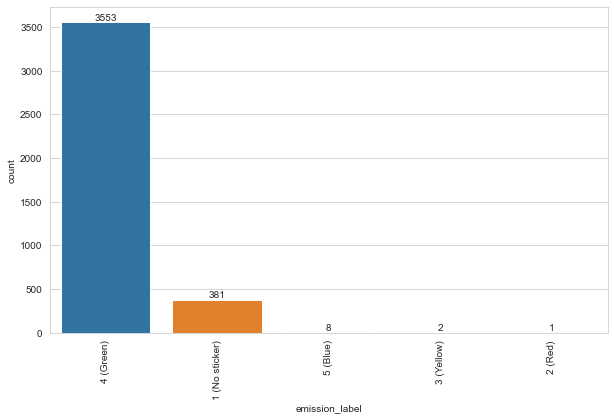

In [372]:
ax = sns.countplot(data=df, x="emission_label")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

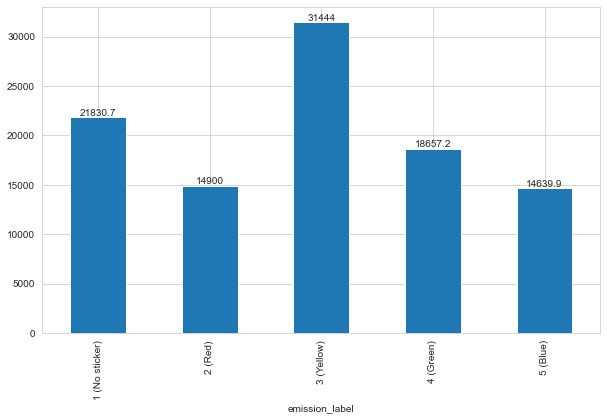

In [373]:
# plotting average price by emission_label 
ax = df.groupby("emission_label").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

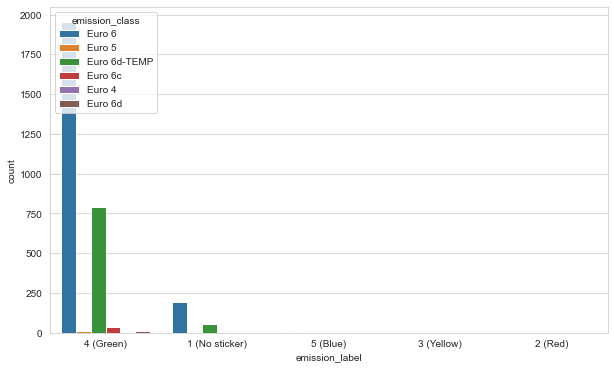

In [374]:
sns.countplot(data=df, x="emission_label", hue="emission_class");

In [375]:
df[["emission_class","emission_label"]]

,emission_class,emission_label
0,Euro 6,NaN
1,Euro 6,4 (Green)
2,Euro 6,4 (Green)
3,Euro 6,NaN
4,Euro 6,NaN
...,...,...
15914,NaN,NaN
15915,NaN,NaN
15916,Euro 6d-TEMP,NaN
15917,Euro 6,NaN


In [376]:
df.groupby(["emission_class", "emission_label"]).emission_label.count()

emission_class  emission_label
Euro 4          4 (Green)            3
Euro 5          1 (No sticker)       2
                4 (Green)            9
Euro 6          1 (No sticker)     194
                4 (Green)         1952
                5 (Blue)             4
Euro 6c         4 (Green)           34
Euro 6d         1 (No sticker)       1
                4 (Green)           14
Euro 6d-TEMP    1 (No sticker)      57
                3 (Yellow)           1
                4 (Green)          788
Name: emission_label, dtype: int64

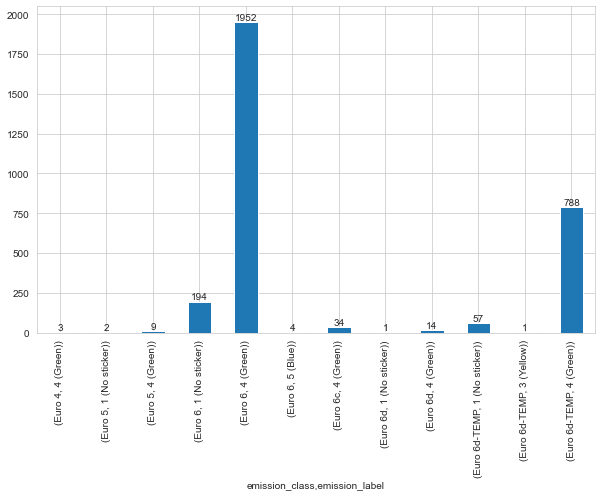

In [377]:
ax = df.groupby(["emission_class", "emission_label"]).emission_label.count().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

>11974 null values, 75%. can't find any relation to price. good to drop column.

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">gears</p>

In [378]:
# Checking the count of body types in each categories and visualize it with countplot
df.gears.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: gears, dtype: int64

In [379]:
df["gears"] = df["gears"].apply(lambda item: item[0] if type(item) == list else item)
df["gears"]

0          NaN
1        \n7\n
2          NaN
3        \n6\n
4          NaN
         ...  
15914    \n6\n
15915    \n7\n
15916    \n6\n
15917    \n6\n
15918      NaN
Name: gears, Length: 15919, dtype: object

In [380]:
df["gears"] = df["gears"].str.strip("\n")
df["gears"]

0        NaN
1          7
2        NaN
3          6
4        NaN
        ... 
15914      6
15915      7
15916      6
15917      6
15918    NaN
Name: gears, Length: 15919, dtype: object

In [381]:
df.gears.value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: gears, dtype: int64

In [382]:
df.gears.isnull().sum() / df.gears.shape[0]

0.29599849236761105

>4712 null values, 30%

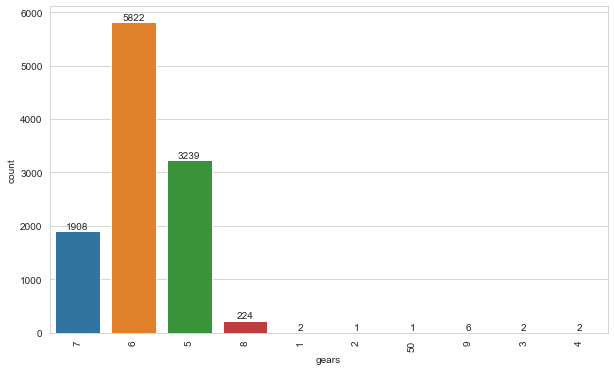

In [383]:
ax = sns.countplot(data=df, x="gears")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

>'1' to '4' gears extreme. '50' could be typo -->5

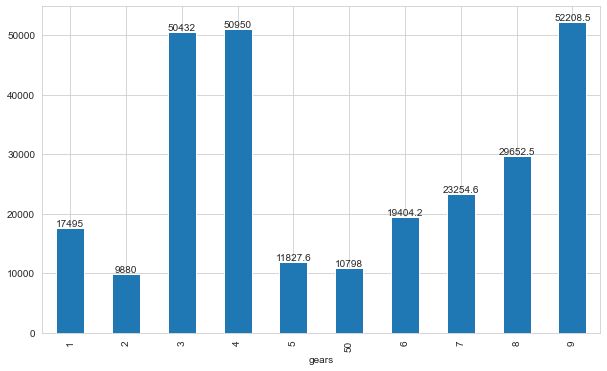

In [384]:
# plotting average price by gears 
ax = df.groupby("gears").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">country_version</p>

In [385]:
# Checking the count of body types in each categories and visualize it with countplot
df.country_version.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: country_version, dtype: int64

In [386]:
df["country_version"] = df["country_version"].apply(lambda item: item[0] if type(item) == list else item)
df["country_version"]

0                NaN
1                NaN
2                NaN
3                NaN
4        \nGermany\n
            ...     
15914            NaN
15915    \nGermany\n
15916    \nAustria\n
15917            NaN
15918    \nGermany\n
Name: country_version, Length: 15919, dtype: object

In [387]:
df["country_version"] = df["country_version"].str.strip("\n")
df["country_version"]

0            NaN
1            NaN
2            NaN
3            NaN
4        Germany
          ...   
15914        NaN
15915    Germany
15916    Austria
15917        NaN
15918    Germany
Name: country_version, Length: 15919, dtype: object

In [388]:
df.country_version.value_counts(dropna=False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

In [389]:
df.country_version.isnull().sum() / df.country_version.shape[0]

0.5234625290533325

>8333 null values, 52%

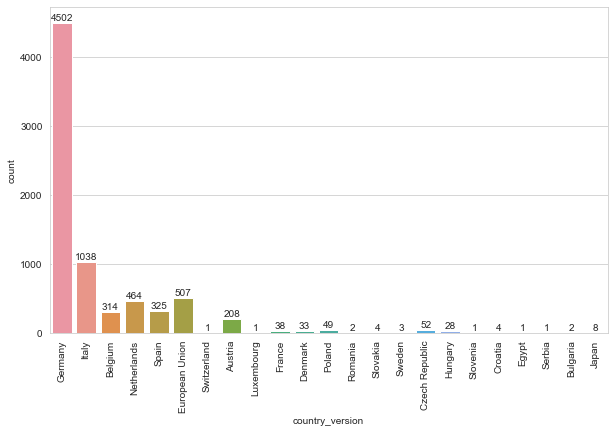

In [390]:
ax = sns.countplot(data=df, x="country_version")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

>extreme values, any value to analysis?

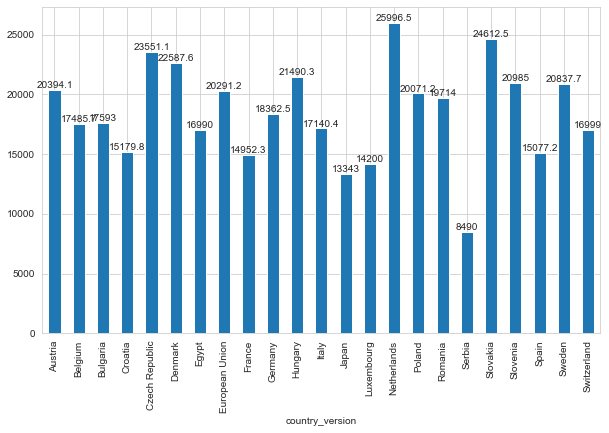

In [391]:
# plotting average price by country_version 
ax = df.groupby("country_version").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">electricity_consumption</p>

In [392]:
# Checking the count of body types in each categories and visualize it with countplot
df.electricity_consumption.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                          15782
[\n0 kWh/100 km (comb)\n]      137
Name: electricity_consumption, dtype: int64

>good to drop column, has either null or 0

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">last_service_date</p>

In [393]:
# Checking the count of body types in each categories and visualize it with countplot
df.last_service_date.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                       15353
[\n02/2019\n, \nEuro 6\n]                    23
[\n05/2019\n, \nEuro 6\n]                    16
[\n01/2018\n, \n118 g CO2/km (comb)\n]       15
[\n03/2019\n, \nEuro 6\n]                    15
                                          ...  
[\n01/2017\n, \n95 g CO2/km (comb)\n]         1
[\n06/2019\n, \n87 g CO2/km (comb)\n]         1
[\n10/2018\n, \n100 g CO2/km (comb)\n]        1
[\n02/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2019\n, \n120 g CO2/km (comb)\n]        1
Name: last_service_date, Length: 267, dtype: int64

In [394]:
df["last_service_date"] = df["last_service_date"].apply(lambda item: item[0] if type(item) == list else item)
df["last_service_date"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: last_service_date, Length: 15919, dtype: object

In [395]:
df.last_service_date.sample(5)

13746    NaN
15399    NaN
4675     NaN
12762    NaN
11320    NaN
Name: last_service_date, dtype: object

In [396]:
df["last_service_date"] = df["last_service_date"].str.strip("\n")
df["last_service_date"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: last_service_date, Length: 15919, dtype: object

In [397]:
df.last_service_date.value_counts(dropna=False)

NaN        15353
05/2019       61
02/2019       55
01/2019       51
06/2019       49
04/2019       48
03/2019       47
12/2018       32
10/2018       24
06/2018       21
05/2018       21
07/2018       21
01/2018       20
09/2018       17
11/2018       17
04/2018       16
08/2018       13
03/2018        9
06/2017        7
02/2018        5
05/2017        3
12/2017        3
02/2017        3
10/2017        3
01/2017        3
11/2017        2
06/2016        2
04/2016        2
07/2017        2
11/2019        1
10/2019        1
07/2019        1
03/2016        1
09/2019        1
08/2019        1
09/2017        1
05/2016        1
04/2017        1
Name: last_service_date, dtype: int64

In [398]:
df.last_service_date.isnull().sum() / df.last_service_date.shape[0]

0.9644450028268108

>15353 null values, 96%. good to drop column

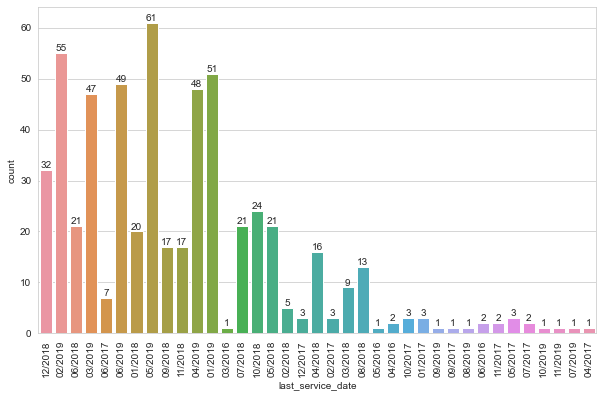

In [399]:
ax = sns.countplot(data=df, x="last_service_date")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

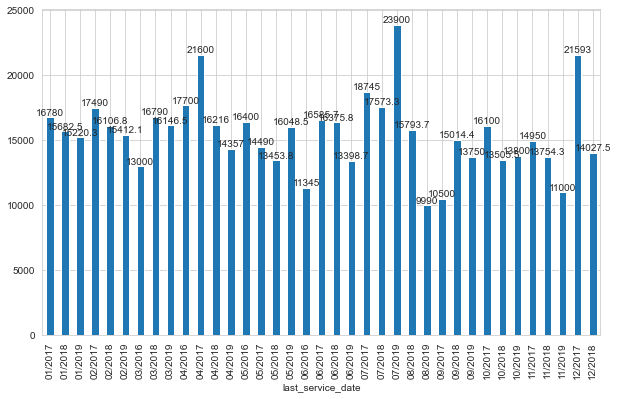

In [400]:
# plotting average price by last_service_date 
ax = df.groupby("last_service_date").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

#### <p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">other_fuel_types</p>

In [401]:
# Checking the count of body types in each categories and visualize it with countplot
df.other_fuel_types.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN             15039
[[], [], []]      880
Name: other_fuel_types, dtype: int64

>good to drop column, has either null or 0

#### .<p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">availability</p>

In [402]:
# Checking the count of body types in each categories and visualize it with countplot
df.availability.value_counts(dropna=False)

NaN                              15284
\nin 90 days from ordering\n       196
\nin 120 days from ordering\n      182
\nin 1 day from ordering\n          51
\nin 5 days from ordering\n         35
\nin 3 days from ordering\n         35
\nin 180 days from ordering\n       24
\nin 14 days from ordering\n        24
\nin 7 days from ordering\n         20
\nin 150 days from ordering\n       18
\nin 2 days from ordering\n         16
\nin 60 days from ordering\n        13
\nin 42 days from ordering\n        10
\nin 21 days from ordering\n         8
\nin 4 days from ordering\n          2
\nin 6 days from ordering\n          1
Name: availability, dtype: int64

In [403]:
df["availability"] = df["availability"].str.strip("\n")
df["availability"]

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                   ...            
15914                          NaN
15915      in 5 days from ordering
15916    in 120 days from ordering
15917                          NaN
15918                          NaN
Name: availability, Length: 15919, dtype: object

In [404]:
df["availability"] = df["availability"].str.strip(" days from ordering")
df["availability"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915      5
15916    120
15917    NaN
15918    NaN
Name: availability, Length: 15919, dtype: object

In [405]:
df.availability.value_counts(dropna=False)

NaN    15284
90       196
120      182
1         51
5         35
3         35
180       24
14        24
7         20
150       18
2         16
60        13
42        10
21         8
4          2
6          1
Name: availability, dtype: int64

In [406]:
df.availability.isnull().sum() / df.availability.shape[0]

0.9601105597085244

>15284 null values, 96%

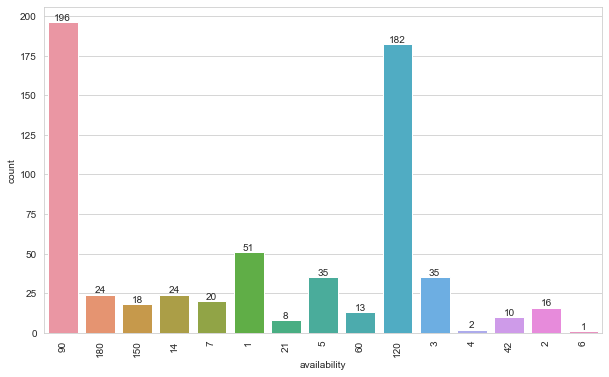

In [407]:
ax = sns.countplot(data=df, x="availability")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

>good to drop column, so many null values

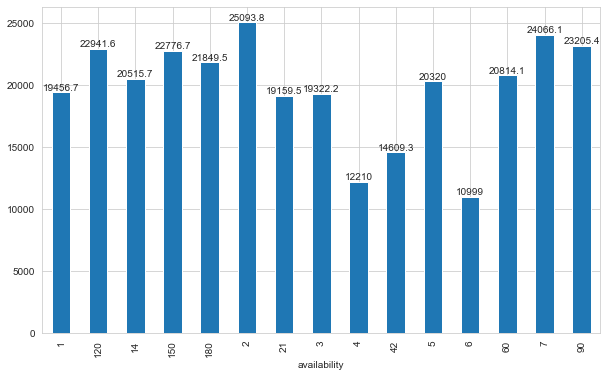

In [408]:
# plotting average price by availability 
ax = df.groupby("availability").price.mean().plot(kind='bar')

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

#### .<p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">last_timing_belt_service_date</p>

In [409]:
# Checking the count of body types in each categories and visualize it with countplot
df.last_timing_belt_service_date.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                          15903
[\n04/2016\n]                    2
[\n12/1900\n]                    1
[\n07/2018\n]                    1
[\n01/1900\n]                    1
[\n05/2019\n]                    1
[\n09/2018\n]                    1
[\n05/2018\n, \nEuro 6\n]        1
[\n06/2017\n]                    1
[\n01/2019\n]                    1
[\n02/2019\n]                    1
[\n02/2018\n]                    1
[\n06/2019\n]                    1
[\n01/2018\n]                    1
[\n04/2019\n]                    1
[\n01/1970\n]                    1
Name: last_timing_belt_service_date, dtype: int64

>good to drop column, so many null values

#### .<p style="background-color:#00b386; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">available_from</p>

In [410]:
# Checking the count of body types in each categories and visualize it with countplot
df.available_from.value_counts(dropna=False)

NaN             15647
\n31/08/19\n       98
\n30/07/19\n       25
\n15/08/19\n       24
\n16/09/19\n       14
\n29/06/19\n       12
\n01/07/19\n       11
\n28/06/19\n       10
\n19/08/19\n        7
\n10/09/19\n        6
\n26/06/19\n        5
\n27/06/19\n        5
\n10/11/19\n        5
\n08/07/19\n        4
\n15/07/19\n        3
\n25/10/19\n        3
\n01/08/19\n        3
\n04/07/19\n        2
\n05/08/19\n        2
\n24/08/19\n        2
\n16/07/19\n        2
\n20/07/19\n        2
\n05/07/19\n        2
\n30/06/19\n        2
\n30/09/19\n        1
\n31/10/19\n        1
\n27/07/19\n        1
\n02/07/19\n        1
\n10/07/19\n        1
\n19/07/19\n        1
\n24/07/19\n        1
\n29/07/19\n        1
\n29/09/19\n        1
\n18/08/19\n        1
\n14/09/19\n        1
\n18/07/19\n        1
\n16/08/19\n        1
\n24/09/19\n        1
\n17/08/19\n        1
\n10/10/19\n        1
\n06/12/19\n        1
\n03/12/19\n        1
\n05/12/19\n        1
\n11/08/19\n        1
\n10/12/19\n        1
\n01/09/19

In [411]:
df["available_from"] = df["available_from"].str.strip("\n")
df["available_from"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: available_from, Length: 15919, dtype: object

In [412]:
df.available_from.value_counts(dropna=False)

NaN         15647
31/08/19       98
30/07/19       25
15/08/19       24
16/09/19       14
29/06/19       12
01/07/19       11
28/06/19       10
19/08/19        7
10/09/19        6
26/06/19        5
27/06/19        5
10/11/19        5
08/07/19        4
15/07/19        3
25/10/19        3
01/08/19        3
04/07/19        2
05/08/19        2
24/08/19        2
16/07/19        2
20/07/19        2
05/07/19        2
30/06/19        2
30/09/19        1
31/10/19        1
27/07/19        1
02/07/19        1
10/07/19        1
19/07/19        1
24/07/19        1
29/07/19        1
29/09/19        1
18/08/19        1
14/09/19        1
18/07/19        1
16/08/19        1
24/09/19        1
17/08/19        1
10/10/19        1
06/12/19        1
03/12/19        1
05/12/19        1
11/08/19        1
10/12/19        1
01/09/19        1
03/08/19        1
Name: available_from, dtype: int64

>good to drop column, so many null values

### Exporting cleaned dataframe

In [413]:
df.head().T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,Unknown,Unknown
km,56013.000,80000.000,83450.000,73000.000,16200.000
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2,None,1,1,1
kW,NaN,NaN,NaN,NaN,NaN


In [415]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp_kW', 'car_type',
       'previous_owners', 'next_inspection', 'inspection_new', 'warranty',
       'full_service', 'non_smoking_vehicle', 'null', 'make', 'model',
       'offer_number', 'first_registration', 'body_color', 'paint_type',
       'body_color_original', 'upholstery', 'body', 'nr_of_doors',
       'nr_of_seats', 'model_code', 'gearing_type', 'displacement_cc',
       'cylinders', 'weight_kg', 'drive_chain', 'fuel_type', 'consumption',
       'CO2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'description',
       'emission_label', 'gears', 'country_version', 'electricity_consumption',
       'last_service_date', 'other_fuel_types', 'availability',
       'last_timing_belt_service_date', 'available_from', 'age', 'cons_comb',
       'consumption2'],
      dtype='object')

In [429]:
columns_to_drop = ['url', 'short_description', 'registration', 'prev_owner', 'kW', 'next_inspection', 'inspection_new', 'warranty',
       'full_service', 'non_smoking_vehicle', 'null', 'make', 'model',
       'offer_number', 'first_registration', 'body', 'model_code', 'consumption', 'description',
       'emission_label', 'electricity_consumption',
       'last_service_date', 'other_fuel_types', 'availability',
       'last_timing_belt_service_date', 'available_from', 'consumption2']


In [430]:
#dropping columns
clean_df = df.drop(columns=columns_to_drop)
clean_df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,Unknown,Unknown
km,56013.000,80000.000,83450.000,73000.000,16200.000
hp_kW,66.000,141.000,85.000,66.000,66.000
car_type,Used,Used,Used,Used,Used
previous_owners,2,NaN,1,1,1
body_color,Black,Red,Black,Brown,Black
paint_type,Metallic,NaN,Metallic,Metallic,Metallic


In [432]:
#descriptive stats
clean_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
make_model,15919,9,Audi A3,3097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_type,15859,9,Sedans,7903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,15919.000,NaN,NaN,NaN,18019.897,7386.169,13.000,12850.000,16900.000,21900.000,74600.000
vat,15919,3,VAT deductible,10980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
km,14895.000,NaN,NaN,NaN,34130.128,37352.978,0.000,5153.000,22740.000,49371.500,317000.000
hp_kW,15831.000,NaN,NaN,NaN,88.368,26.835,1.000,66.000,85.000,101.000,294.000
car_type,15917,5,Used,11096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_owners,9279,5,1,8294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_color,15322,14,Black,3745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_type,10147,3,Metallic,9794,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [434]:
# categorical columns
object_col = clean_df.select_dtypes(include='object').columns
object_col

Index(['make_model', 'body_type', 'vat', 'car_type', 'previous_owners',
       'body_color', 'paint_type', 'body_color_original', 'upholstery',
       'nr_of_doors', 'nr_of_seats', 'gearing_type', 'cylinders',
       'drive_chain', 'fuel_type', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears',
       'country_version'],
      dtype='object')

In [435]:
# categorical columns values overview
for col in object_col:
    print(col)
    print("--"*8)
    print(clean_df[col].value_counts(dropna=False))
    print("**"*20)

make_model
----------------
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64
****************************************
body_type
----------------
Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64
****************************************
vat
----------------
VAT deductible      10980
Unknown              4513
Price negotiable      426
Name: vat, dtype: int64
****************************************
car_type
----------------
Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: car_type, dtype: int64
************

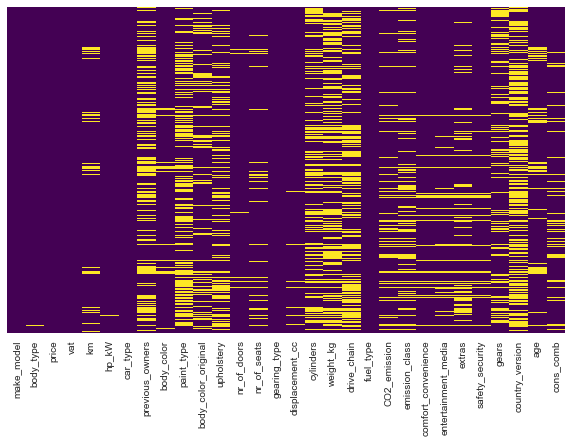

In [436]:
#null values overview
sns.heatmap(clean_df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

## Export dataframe to csv file (cleaned)

In [438]:
clean_df.to_csv("clean_scout.csv", index=False)

# PART- 2 `( Handling With Missing Vales )`

# PART- 3 `( Handling With Outliers )`

## Export dataframe to csv file (filled)

In [422]:
# filled_scout.csv
#df.to_csv("filled_scout.csv", index=False)

# Final Step (Checking final situation of data via graphs)

## Export dataframe to csv file (without dummy)

In [423]:
#df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

## Export dataframe to csv file (dummy)

In [424]:
#df_dummied.to_csv("final_scout_dummy.csv", index=False)